## **MLHW1資三甲110816002張甄真**

### **一、資料清理與視覺化圖表**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount("/content/MyGoogleDrive")

# df = pd.read_csv("HW2_heart_2020_cleaned.csv")
df = pd.read_csv("/content/MyGoogleDrive/My Drive/data_csv/HW2_heart_2020_cleaned.csv")
# 資料集資訊
df.info()
print(df.shape)
# 遺漏值
print(df.isnull().sum())

Mounted at /content/MyGoogleDrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null 

In [ ]:
for i in df.columns:
  print(i, "：", df[i].unique())

HeartDisease ： ['No' 'Yes']
BMI ： [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking ： ['Yes' 'No']
AlcoholDrinking ： ['No' 'Yes']
Stroke ： ['No' 'Yes']
PhysicalHealth ： [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth ： [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking ： ['No' 'Yes']
Sex ： ['Female' 'Male']
AgeCategory ： ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ： ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ： ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ： ['Yes' 'No']
GenHealth ： ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime ： [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma ： ['Yes' 'No']

In [ ]:
for i in df.columns:
  print(i, "：")
  print(df[i].value_counts())
# df["Smoking"].unique()
# df["Smoking"].value_counts()

HeartDisease ：
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
BMI ：
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64
Smoking ：
No     187887
Yes    131908
Name: Smoking, dtype: int64
AlcoholDrinking ：
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
Stroke ：
No     307726
Yes     12069
Name: Stroke, dtype: int64
PhysicalHealth ：
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import average_precision_score # AP值
from sklearn.metrics import precision_recall_curve #ROC
from sklearn.metrics import plot_precision_recall_curve
from sklearn import metrics

In [ ]:
# 將AgeCategory的年齡區間轉為數值型
age_mapping = {'80 or older':80, '75-79':77, '70-74':72, '65-69':67, '60-64':62,
          '55-59':57, '50-54':52, '45-49':47, '40-44':42, '35-39':37, '30-34':32,
          '25-29':27, '18-24':21}
df['Age'] = df['AgeCategory'].map(age_mapping)
df['Age'] = df['Age'].astype('int')

In [ ]:
# 將變數分為數值型及類別型
df_cat = df.select_dtypes(include=['object'])
df_cat = df_cat.drop(['HeartDisease'], axis=1)
df_num = df.select_dtypes(include=['float64', 'int'])
print("類別型變數rowXcolumn：", df_cat.shape)
print("數值型變數rowXcolumn：", df_num.shape)
print(df_cat.columns)
print(df_num.columns)

類別型變數rowXcolumn： (319795, 13)
數值型變數rowXcolumn： (319795, 5)
Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Age'], dtype='object')


In [ ]:
# 檢查是否為二元類別型變數
df_cat.nunique()

Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

In [ ]:
sample = df[df["HeartDisease"]=='No'].sample(1000)
sample

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
212196,No,31.31,No,No,No,0.0,0.0,No,Female,75-79,White,Yes,Yes,Good,8.0,No,Yes,No,77
134933,No,33.72,Yes,No,No,1.0,5.0,No,Male,30-34,White,No,Yes,Good,6.0,No,No,No,32
101794,No,28.32,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,No,Fair,6.0,No,No,No,42
205702,No,27.71,No,No,No,0.0,0.0,No,Male,40-44,White,No,Yes,Very good,6.0,No,No,No,42
134613,No,25.84,Yes,No,No,7.0,0.0,No,Male,25-29,White,No,Yes,Excellent,8.0,No,No,No,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262416,No,22.46,Yes,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Very good,10.0,No,No,No,42
235419,No,32.78,Yes,No,No,0.0,0.0,No,Male,65-69,White,Yes,Yes,Good,7.0,No,No,Yes,67
306799,No,21.89,No,No,No,30.0,30.0,No,Male,60-64,White,Yes,Yes,Fair,12.0,No,Yes,No,62
74404,No,26.39,No,No,No,0.0,9.0,No,Male,40-44,White,No,Yes,Very good,7.0,Yes,No,No,42


### **視覺化圖表**

### **數值型變數**
df_num=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Age']
🐈

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

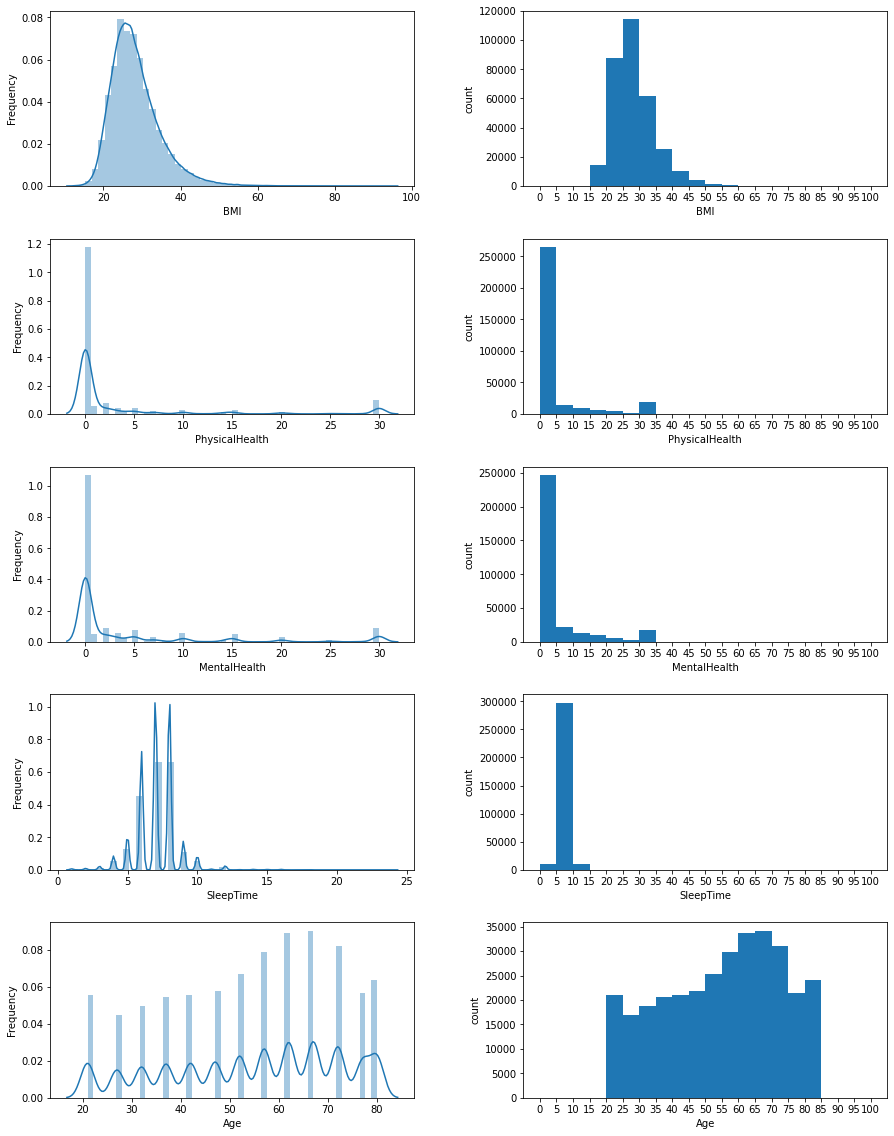

In [ ]:
fig ,ax = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(15, 20))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔

bins_list=[] #分布區域(組距)
for i in range(0,105,5):
  bins_list.append(i)

    
labelnum = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime", "Age"]
j=0
for i in range(1,11):
    plt.subplot(5, 2, i),
    if i%2==1:
      name = labelnum[j]
      sns.distplot(df[name])
      plt.ylabel("Frequency")
    else:
      j+=1
      plt.hist(df[name], bins=bins_list)
      plt.ylabel("count")
      plt.xticks(bins_list)
    plt.xlabel(name)

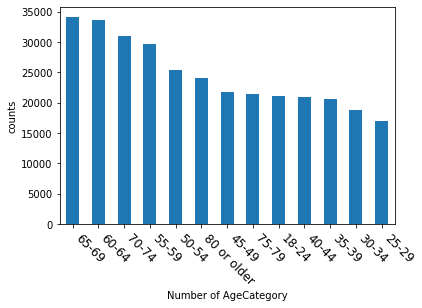

In [ ]:
# 若為類別型之AgeCategory
p = df_cat["AgeCategory"].value_counts().plot(kind='bar')
p.set(xlabel = 'Number of AgeCategory', ylabel='counts')
plt.xticks( rotation=-45,  horizontalalignment='left', fontsize=12)
plt.show()

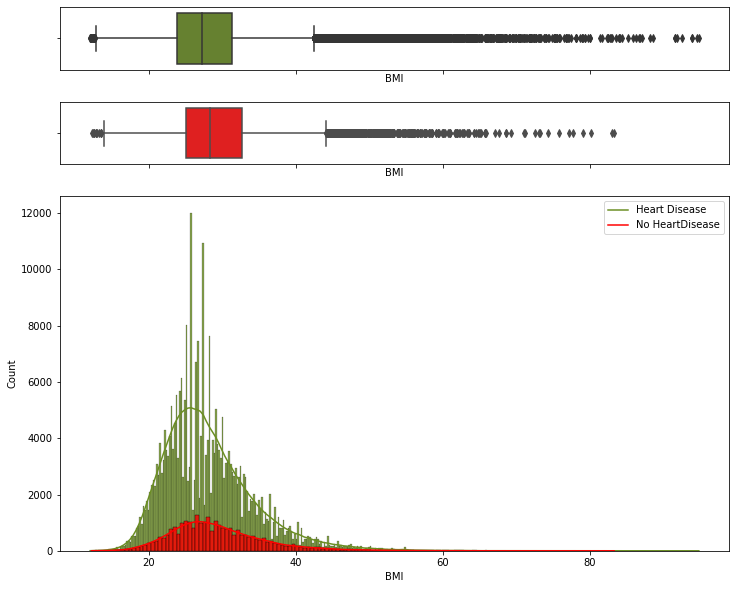

In [ ]:
# BMI
flg, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)}, figsize=(12, 10))
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

sns.boxplot(x=df[df['HeartDisease']=='No']["BMI"], ax=ax_box1, color="olivedrab")
sns.boxplot(x=df[df['HeartDisease']=='Yes']["BMI"], ax=ax_box2, color="red")

sns.histplot(df[df['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, alpha=0.8, color="olivedrab")
sns.histplot(df[df['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, alpha=0.8, color="red")

plt.legend(title='', loc='upper right', labels=['Heart Disease', 'No HeartDisease'])
plt.show()

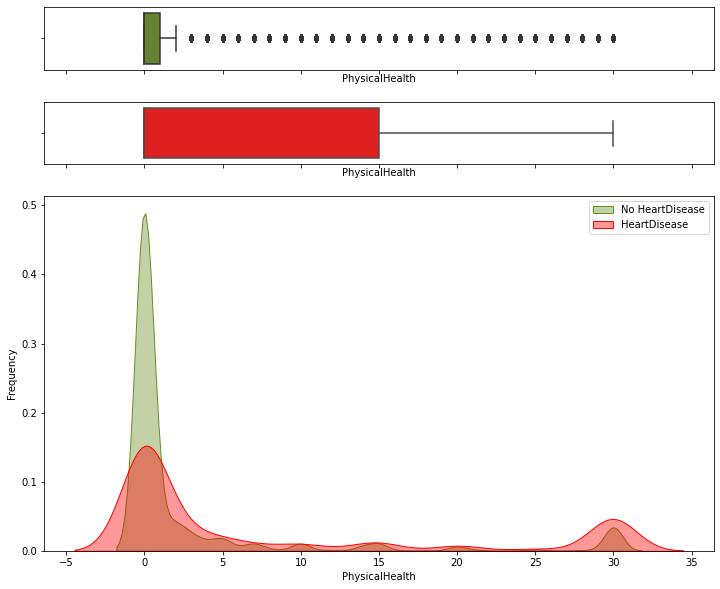

In [ ]:
# PhysicalHealth
flg, (ax_box1, ax_box2, ax_kde) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)}, figsize=(12, 10))
sns.boxplot(x=df[df['HeartDisease']=='No']["PhysicalHealth"], ax=ax_box1, color="olivedrab")
sns.boxplot(x=df[df['HeartDisease']=='Yes']["PhysicalHealth"], ax=ax_box2, color="red")


# fig, ax = plt.subplots()
sns.kdeplot(df[df["HeartDisease"]=='No']["PhysicalHealth"], shade = True, alpha=0.4, color="olivedrab", label="No HeartDisease", ax = ax_kde)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["PhysicalHealth"], shade = True, alpha=0.4, color="red", label="HeartDisease", ax = ax_kde)
# plt.xlim(0, 30)
plt.xlabel("PhysicalHealth")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

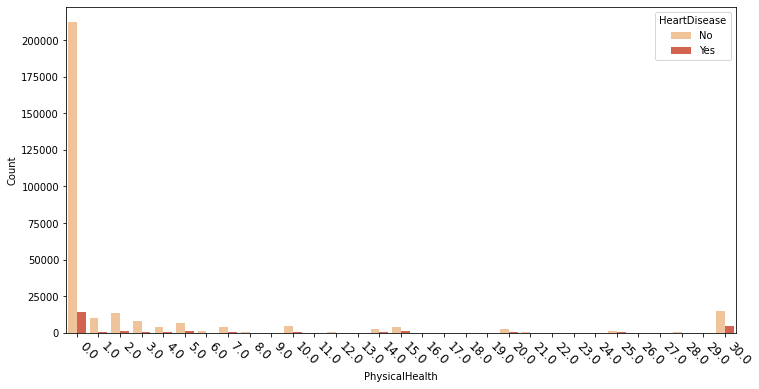

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = df['PhysicalHealth'], hue = 'HeartDisease', data = df, palette = 'OrRd')
plt.xlabel('PhysicalHealth')
plt.ylabel('Count')
plt.xticks( rotation=-45,  horizontalalignment='left', fontsize=12)
plt.show()

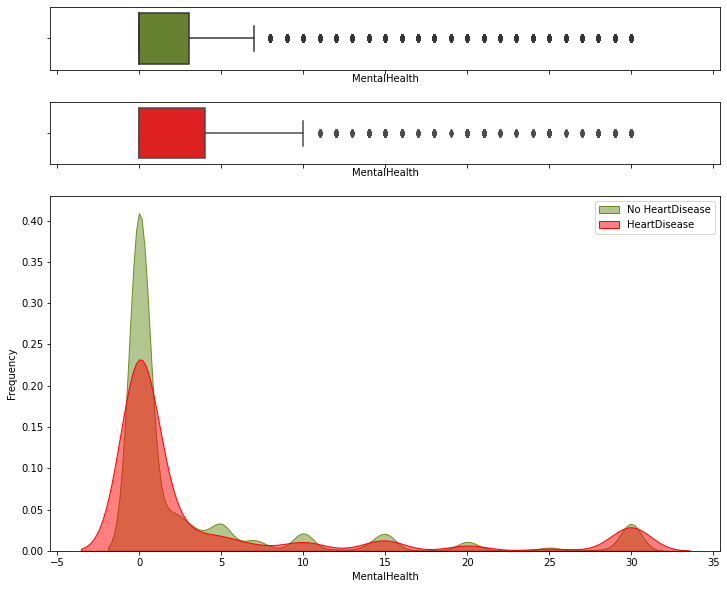

In [ ]:
# MentalHealth
flg, (ax_box1, ax_box2, ax_kde) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)}, figsize=(12, 10))
sns.boxplot(x=df[df['HeartDisease']=='No']["MentalHealth"], ax=ax_box1, color="olivedrab")
sns.boxplot(x=df[df['HeartDisease']=='Yes']["MentalHealth"], ax=ax_box2, color="red")


sns.kdeplot(df[df["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,shade = True, color="olivedrab", label="No HeartDisease", ax = ax_kde)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax_kde)
plt.xlabel("MentalHealth")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

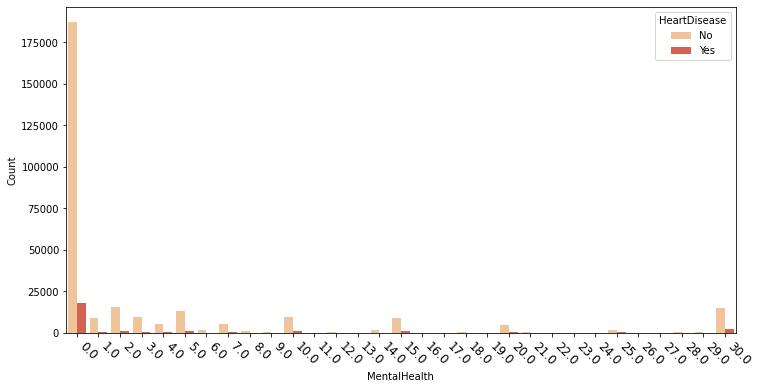

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = df['MentalHealth'], hue = 'HeartDisease', data = df, palette = 'OrRd')
plt.xlabel('MentalHealth')
plt.ylabel('Count')
plt.xticks( rotation=-45,  horizontalalignment='left', fontsize=12)
plt.show()

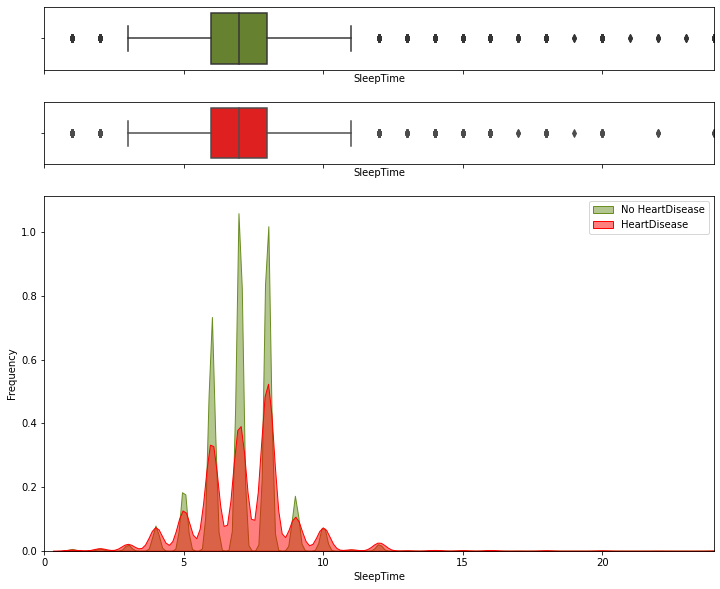

In [ ]:
# SleepTime
flg, (ax_box1, ax_box2, ax_kde) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)}, figsize=(12, 10))
sns.boxplot(x=df[df['HeartDisease']=='No']["SleepTime"], ax=ax_box1, color="olivedrab")
sns.boxplot(x=df[df['HeartDisease']=='Yes']["SleepTime"], ax=ax_box2, color="red")

plt.xlim(0, 24)
sns.kdeplot(df[df["HeartDisease"]=='No']["SleepTime"], alpha=0.5,shade = True, color="olivedrab", label="No HeartDisease", ax = ax_kde)
sns.kdeplot(df[df["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax_kde)
plt.xlabel("SleepTime")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

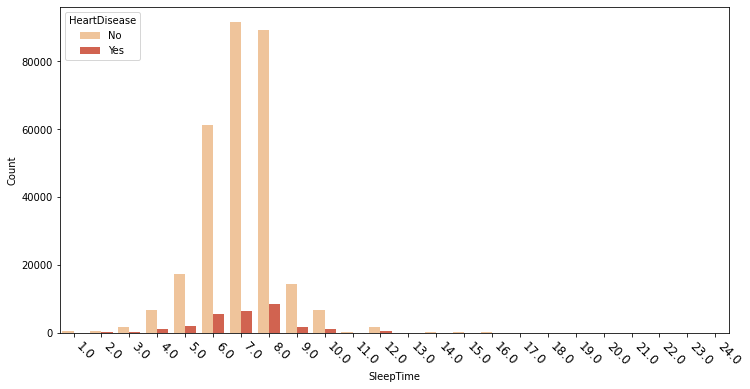

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = df['SleepTime'], hue = 'HeartDisease', data = df, palette = 'OrRd')
plt.xlabel('SleepTime')
plt.ylabel('Count')
plt.xticks( rotation=-45,  horizontalalignment='left', fontsize=12)
plt.show()

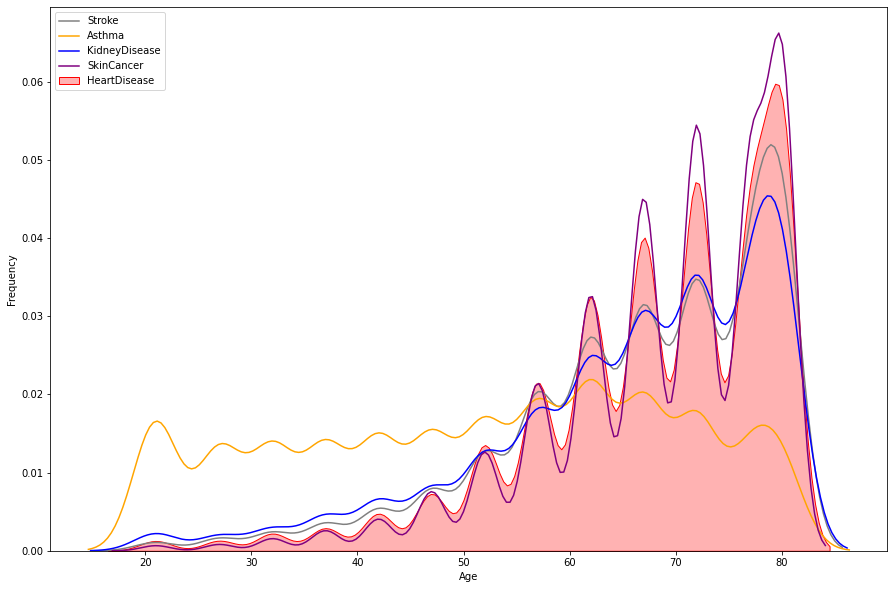

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["Age"], alpha=0.3, shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["Stroke"]=='Yes']["Age"], color="gray", label="Stroke", ax = ax)
sns.kdeplot(df[df["Asthma"]=='Yes']["Age"], color="orange", label="Asthma", ax = ax)
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["Age"], color="blue", label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["SkinCancer"]=='Yes']["Age"], color="purple", label="SkinCancer", ax = ax)


plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(loc="upper left")
plt.show()

### **類別型變數**

df_cat=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
      'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
      'Asthma', 'KidneyDisease', 'SkinCancer']
🛫

In [ ]:
# # # 取樣
# sample_no = df[df["HeartDisease"]=='No'].sample(15000, replace=False)
# # sample_no
# sample_yes = df[df["HeartDisease"]=='Yes'].sample(15000, replace=False)
# # sample_yes
# sample = pd.concat([sample_yes,sample_no])
# sample

In [ ]:
# re = sample[sample["HeartDisease"]=='No']["KidneyDisease"].value_counts()
# re_2 = sample[sample["HeartDisease"]=='Yes']["KidneyDisease"].value_counts()

# print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
# print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

# print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
# print("No無心臟疾病：人數：%d, 比例：%.3f"%(re["No"], re["No"]/(re["No"] + re_2["No"])))

Yes有心臟疾病：人數：1913, 比例：0.831
Yes無心臟疾病：人數：390, 比例：0.169
No有心臟疾病：人數：13087, 比例：0.473
No無心臟疾病：人數：14610, 比例：0.527


In [ ]:
df_cat = df_cat.drop(['AgeCategory'], axis=1)

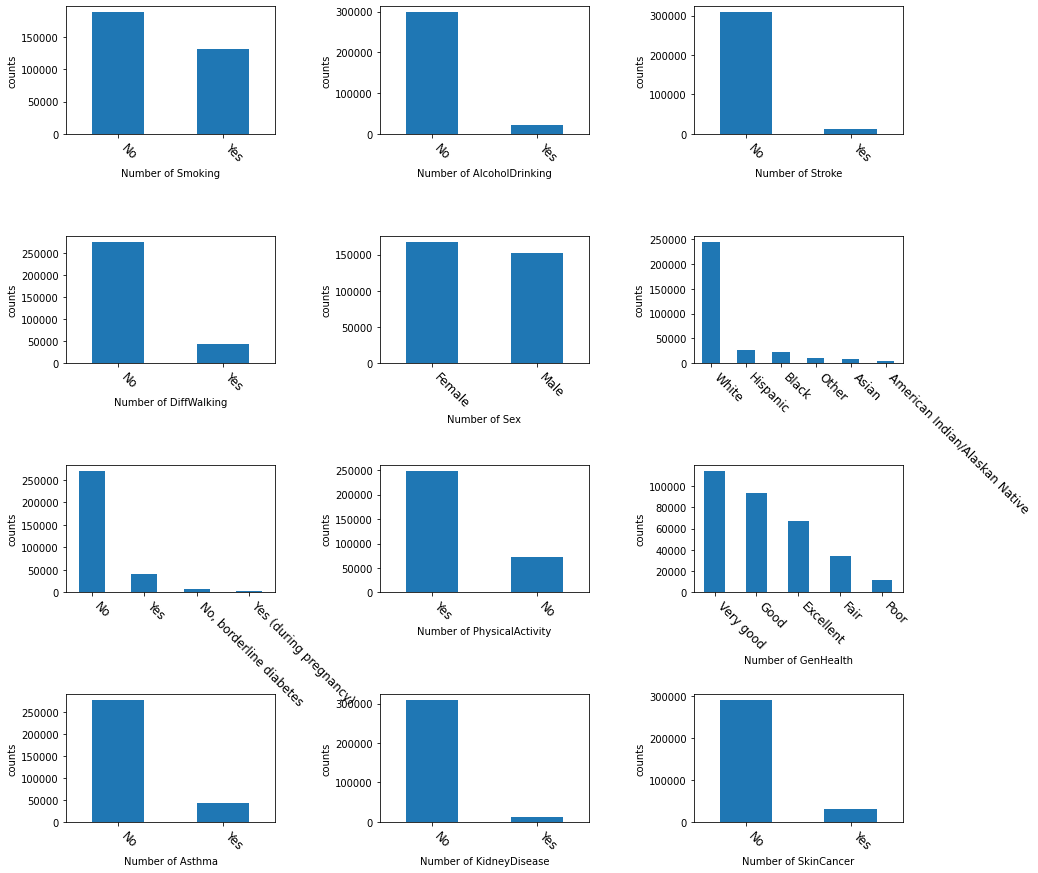

In [ ]:
# 類別型變數加總長條圖
fig , ax = plt.subplots(4, 3, figsize=(15,15))
fig.subplots_adjust(hspace=0.8, wspace=0.5)
labelcat = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for i in range(1,13):
  plt.subplot(4,3,i)
  p = df_cat[labelcat[i-1]].value_counts().plot(kind='bar')
  # plt.title(labelcat[i-1])
  p.set(xlabel = 'Number of '+labelcat[i-1], ylabel='counts')
  plt.xticks( rotation=-45,  horizontalalignment='left', fontsize=12)
plt.show()

Text(0.5, 1.0, 'HeartDisease')

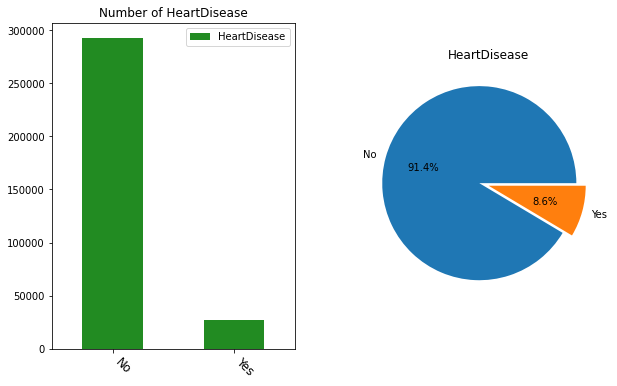

In [ ]:
# 目標項HeartDisease
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)

df['HeartDisease'].value_counts().plot(kind='bar', color="forestgreen")
plt.title("Number of HeartDisease")
plt.xticks( rotation=-45,  horizontalalignment='left', fontsize=12)

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['HeartDisease'].value_counts().index)
value=[x for x in df['HeartDisease'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("HeartDisease")

年齡與種族

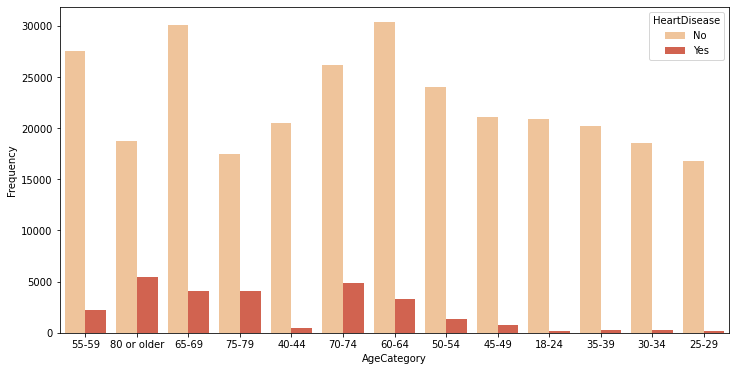

In [ ]:
# 類別型年齡區間心臟疾病人數
plt.figure(figsize = (12,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'OrRd')
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

In [ ]:
re = df[df["HeartDisease"]=='No']["AgeCategory"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["AgeCategory"].value_counts()

print("80 or older有心臟疾病：人數：%d, 比例：%.3f"%(re_2["80 or older"], re_2["80 or older"]/(re["80 or older"] + re_2["80 or older"])))
print("80 or older無心臟疾病：人數：%d, 比例：%.3f"%(re["80 or older"], re["80 or older"]/(re["80 or older"] + re_2["80 or older"])))

print("75-79有心臟疾病：人數：%d, 比例：%.3f"%(re_2["75-79"], re_2["75-79"]/(re["75-79"] + re_2["75-79"])))
print("70-74有心臟疾病：人數：%d, 比例：%.3f"%(re_2["70-74"], re_2["70-74"]/(re["70-74"] + re_2["70-74"])))
print("65-69有心臟疾病：人數：%d, 比例：%.3f"%(re_2["65-69"], re_2["65-69"]/(re["65-69"] + re_2["65-69"])))
print("60-64有心臟疾病：人數：%d, 比例：%.3f"%(re_2["60-64"], re_2["60-64"]/(re["60-64"] + re_2["60-64"])))
print("55-59有心臟疾病：人數：%d, 比例：%.3f"%(re_2["55-59"], re_2["55-59"]/(re["55-59"] + re_2["55-59"])))
print("50-54有心臟疾病：人數：%d, 比例：%.3f"%(re_2["50-54"], re_2["50-54"]/(re["50-54"] + re_2["50-54"])))
print("45-49有心臟疾病：人數：%d, 比例：%.3f"%(re_2["45-49"], re_2["45-49"]/(re["45-49"] + re_2["45-49"])))
print("40-44有心臟疾病：人數：%d, 比例：%.3f"%(re_2["40-44"], re_2["40-44"]/(re["40-44"] + re_2["40-44"])))
print("35-39有心臟疾病：人數：%d, 比例：%.3f"%(re_2["35-39"], re_2["35-39"]/(re["35-39"] + re_2["35-39"])))
print("30-34有心臟疾病：人數：%d, 比例：%.3f"%(re_2["30-34"], re_2["30-34"]/(re["30-34"] + re_2["30-34"])))
print("25-29有心臟疾病：人數：%d, 比例：%.3f"%(re_2["25-29"], re_2["25-29"]/(re["25-29"] + re_2["25-29"])))
print("18-24有心臟疾病：人數：%d, 比例：%.3f"%(re_2["18-24"], re_2["18-24"]/(re["18-24"] + re_2["18-24"])))
print("18-24無心臟疾病：人數：%d, 比例：%.3f"%(re["18-24"], re["18-24"]/(re["18-24"] + re_2["18-24"])))

80 or older有心臟疾病：人數：5449, 比例：0.226
80 or older無心臟疾病：人數：18704, 比例：0.774
75-79有心臟疾病：人數：4049, 比例：0.188
70-74有心臟疾病：人數：4847, 比例：0.156
65-69有心臟疾病：人數：4101, 比例：0.120
60-64有心臟疾病：人數：3327, 比例：0.099
55-59有心臟疾病：人數：2202, 比例：0.074
50-54有心臟疾病：人數：1383, 比例：0.054
45-49有心臟疾病：人數：744, 比例：0.034
40-44有心臟疾病：人數：486, 比例：0.023
35-39有心臟疾病：人數：296, 比例：0.014
30-34有心臟疾病：人數：226, 比例：0.012
25-29有心臟疾病：人數：133, 比例：0.008
18-24有心臟疾病：人數：130, 比例：0.006
18-24無心臟疾病：人數：20934, 比例：0.994


Text(0.5, 1.0, 'Race')

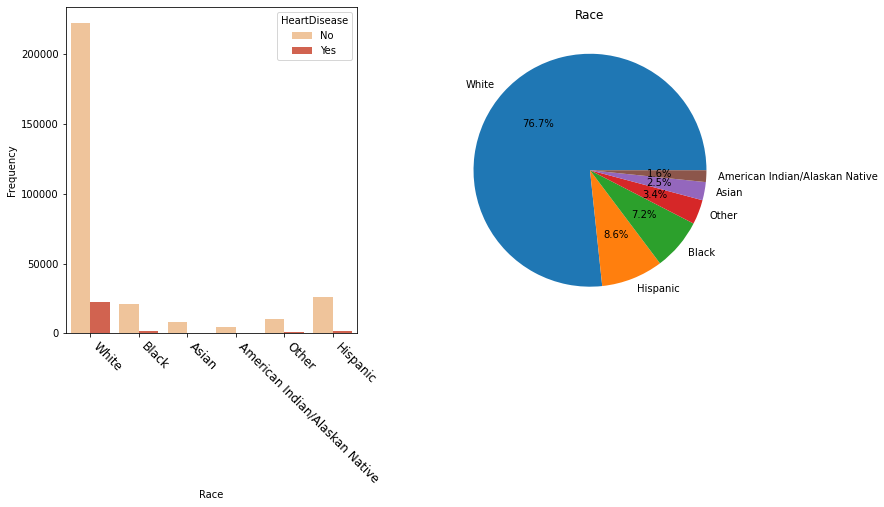

In [ ]:
# Race
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (12,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
# plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Race'], hue = 'HeartDisease', data = df, palette = 'OrRd')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.xticks( rotation=-45,  horizontalalignment='left', fontsize=12)

plt.subplot(1, 2, 2)
count = np.array(df['Race'].value_counts().index)
value=[x for x in df['Race'].value_counts()]
# explode = [0.1, 0]
plt.pie(value, labels=count, autopct= "%3.1f%%")
plt.title("Race")

In [ ]:
re = df[df["HeartDisease"]=='No']["Race"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["Race"].value_counts()

print("White有心臟疾病：人數：%d, 比例：%.3f"%(re_2["White"], re_2["White"]/(re["White"] + re_2["White"])))
print("White無心臟疾病：人數：%d, 比例：%.3f"%(re["White"], re["White"]/(re["White"] + re_2["White"])))

print("Hispanic有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Hispanic"], re_2["Hispanic"]/(re["Hispanic"] + re_2["Hispanic"])))
print("Black有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Black"], re_2["Black"]/(re["Black"] + re_2["Black"])))
print("Other有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Other"], re_2["Other"]/(re["Other"] + re_2["Other"])))
print("Asian有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Asian"], re_2["Asian"]/(re["Asian"] + re_2["Asian"])))
print("American Indian/Alaskan Native有心臟疾病：人數：%d, \
比例：%.3f"%(re_2["American Indian/Alaskan Native"], re_2["American Indian/Alaskan Native"]/(re["American Indian/Alaskan Native"] + re_2["American Indian/Alaskan Native"])))
print("American Indian/Alaskan Native無心臟疾病：人數：%d, \
比例：%.3f"%(re["American Indian/Alaskan Native"], re["American Indian/Alaskan Native"]/(re["American Indian/Alaskan Native"] + re_2["American Indian/Alaskan Native"])))

White有心臟疾病：人數：22507, 比例：0.092
White無心臟疾病：人數：222705, 比例：0.908
Hispanic有心臟疾病：人數：1443, 比例：0.053
Black有心臟疾病：人數：1729, 比例：0.075
Other有心臟疾病：人數：886, 比例：0.081
Asian有心臟疾病：人數：266, 比例：0.033
American Indian/Alaskan Native有心臟疾病：人數：542, 比例：0.104
American Indian/Alaskan Native無心臟疾病：人數：4660, 比例：0.896


其他疾病與心臟疾病關係

Text(0.5, 1.0, 'Stroke')

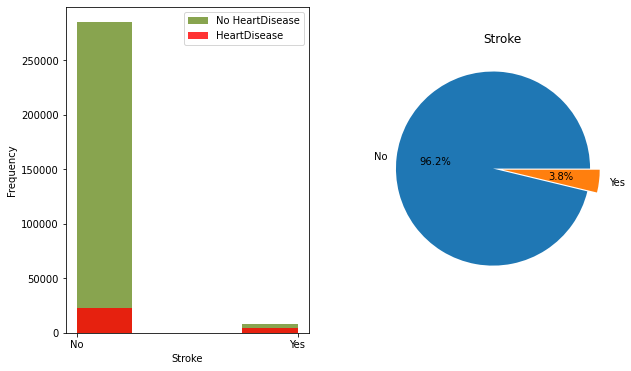

In [ ]:
# Stroke 中風
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

plt.hist(df[df["HeartDisease"]=='No']["Stroke"], bins=4, alpha=0.8, color="olivedrab", label="No HeartDisease")
plt.hist(df[df["HeartDisease"]=='Yes']["Stroke"], bins=4, alpha=0.8, color="red", label="HeartDisease")

plt.xlabel("Stroke")
plt.ylabel("Frequency")

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['Stroke'].value_counts().index)
value=[x for x in df['Stroke'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("Stroke")

In [ ]:
re = df[df["HeartDisease"]=='No']["Stroke"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["Stroke"].value_counts()

print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
print("No無心臟疾病：人數：%d, 比例：%.3f"%(re["No"], re["No"]/(re["No"] + re_2["No"])))

Yes有心臟疾病：人數：4389, 比例：0.364
Yes無心臟疾病：人數：7680, 比例：0.636
No有心臟疾病：人數：22984, 比例：0.075
No無心臟疾病：人數：284742, 比例：0.925


Text(0.5, 1.0, 'Diabetic')

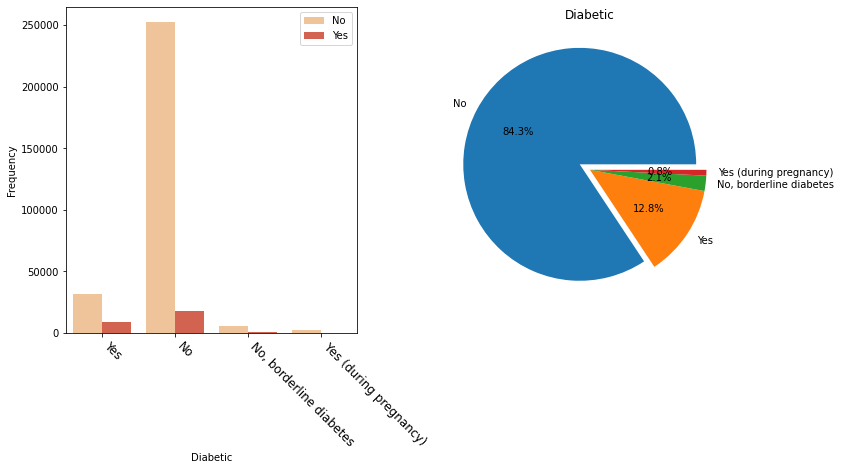

In [ ]:
# Diabetic 糖尿病
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (12,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

# plt.figure(figsize = (12,6))
sns.countplot(x = df['Diabetic'], hue = 'HeartDisease', data = df, palette = 'OrRd')
plt.xlabel('Diabetic')
plt.ylabel('Frequency')
plt.xticks( rotation=-45,  horizontalalignment='left', fontsize=12)

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['Diabetic'].value_counts().index)
value=[x for x in df['Diabetic'].value_counts()]
explode = [0.1, 0, 0, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("Diabetic")

In [ ]:
re = df[df["HeartDisease"]=='No']["Diabetic"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["Diabetic"].value_counts()

print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
print("No, borderline diabetes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No, borderline diabetes"], re_2["No, borderline diabetes"]/(re["No, borderline diabetes"] + re_2["No, borderline diabetes"])))
print("Yes (during pregnancy)有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes (during pregnancy)"], re_2["Yes (during pregnancy)"]/(re["Yes (during pregnancy)"] + re_2["Yes (during pregnancy)"])))

Yes有心臟疾病：人數：8957, 比例：0.220
Yes無心臟疾病：人數：31845, 比例：0.780
No有心臟疾病：人數：17519, 比例：0.065
No, borderline diabetes有心臟疾病：人數：789, 比例：0.116
Yes (during pregnancy)有心臟疾病：人數：108, 比例：0.042


Text(0.5, 1.0, 'Asthma')

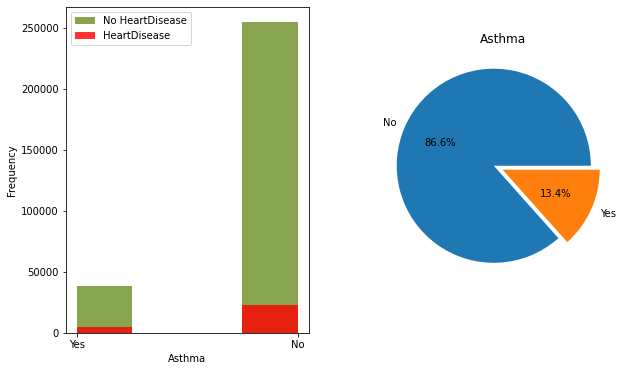

In [ ]:
# Asthma 哮喘
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

plt.hist(df[df["HeartDisease"]=='No']["Asthma"], bins=4, alpha=0.8, color="olivedrab", label="No HeartDisease")
plt.hist(df[df["HeartDisease"]=='Yes']["Asthma"], bins=4, alpha=0.8, color="red", label="HeartDisease")

plt.xlabel("Asthma")
plt.ylabel("Frequency")

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['Asthma'].value_counts().index)
value=[x for x in df['Asthma'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("Asthma")

In [ ]:
re = df[df["HeartDisease"]=='No']["Asthma"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["Asthma"].value_counts()

print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
print("No無心臟疾病：人數：%d, 比例：%.3f"%(re["No"], re["No"]/(re["No"] + re_2["No"])))

Yes有心臟疾病：人數：4933, 比例：0.115
Yes無心臟疾病：人數：37939, 比例：0.885
No有心臟疾病：人數：22440, 比例：0.081
No無心臟疾病：人數：254483, 比例：0.919


Text(0.5, 1.0, 'KidneyDisease')

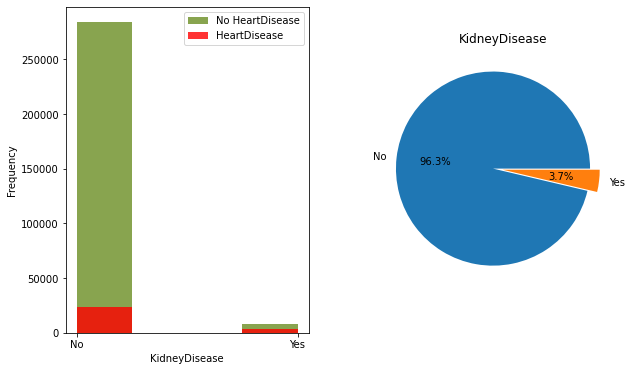

In [ ]:
# KidneyDisease 腎臟疾病
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

plt.hist(df[df["HeartDisease"]=='No']["KidneyDisease"], bins=4, alpha=0.8, color="olivedrab", label="No HeartDisease")
plt.hist(df[df["HeartDisease"]=='Yes']["KidneyDisease"], bins=4, alpha=0.8, color="red", label="HeartDisease")

plt.xlabel("KidneyDisease")
plt.ylabel("Frequency")

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['KidneyDisease'].value_counts().index)
value=[x for x in df['KidneyDisease'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("KidneyDisease")

In [ ]:
re = df[df["HeartDisease"]=='No']["KidneyDisease"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["KidneyDisease"].value_counts()

print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
print("No無心臟疾病：人數：%d, 比例：%.3f"%(re["No"], re["No"]/(re["No"] + re_2["No"])))

Yes有心臟疾病：人數：3455, 比例：0.293
Yes無心臟疾病：人數：8324, 比例：0.707
No有心臟疾病：人數：23918, 比例：0.078
No無心臟疾病：人數：284098, 比例：0.922


Text(0.5, 1.0, 'SkinCancer')

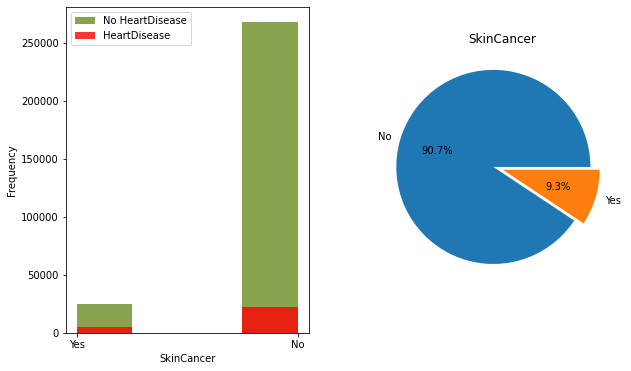

In [ ]:
# SkinCancer 皮膚癌
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

plt.hist(df[df["HeartDisease"]=='No']["SkinCancer"], bins=4, alpha=0.8, color="olivedrab", label="No HeartDisease")
plt.hist(df[df["HeartDisease"]=='Yes']["SkinCancer"], bins=4, alpha=0.8, color="red", label="HeartDisease")

plt.xlabel("SkinCancer")
plt.ylabel("Frequency")

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['SkinCancer'].value_counts().index)
value=[x for x in df['SkinCancer'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("SkinCancer")

In [ ]:
re = df[df["HeartDisease"]=='No']["SkinCancer"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["SkinCancer"].value_counts()

print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
print("No無心臟疾病：人數：%d, 比例：%.3f"%(re["No"], re["No"]/(re["No"] + re_2["No"])))

Yes有心臟疾病：人數：4980, 比例：0.167
Yes無心臟疾病：人數：24839, 比例：0.833
No有心臟疾病：人數：22393, 比例：0.077
No無心臟疾病：人數：267583, 比例：0.923


生活與心臟疾病的關係

Text(0.5, 1.0, 'Smoking')

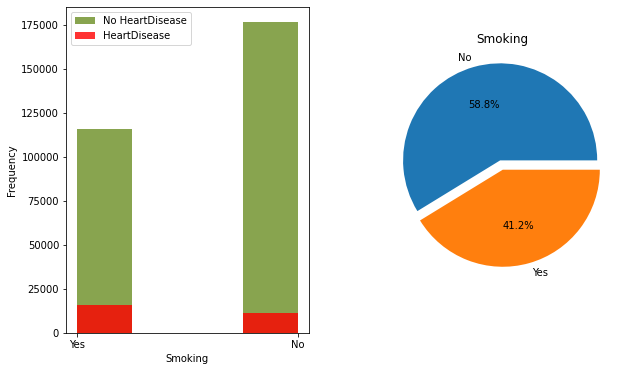

In [ ]:
# Smoking
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

plt.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=4, alpha=0.8, color="olivedrab", label="No HeartDisease")
plt.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=4, alpha=0.8, color="red", label="HeartDisease")

plt.xlabel("Smoking")
plt.ylabel("Frequency")

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['Smoking'].value_counts().index)
value=[x for x in df['Smoking'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("Smoking")

In [ ]:
re = df[df["HeartDisease"]=='No']["Smoking"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["Smoking"].value_counts()

print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
print("No無心臟疾病：人數：%d, 比例：%.3f"%(re["No"], re["No"]/(re["No"] + re_2["No"])))

Yes有心臟疾病：人數：16037, 比例：0.122
Yes無心臟疾病：人數：115871, 比例：0.878
No有心臟疾病：人數：11336, 比例：0.060
No無心臟疾病：人數：176551, 比例：0.940


Text(0.5, 1.0, 'AlcoholDrinking')

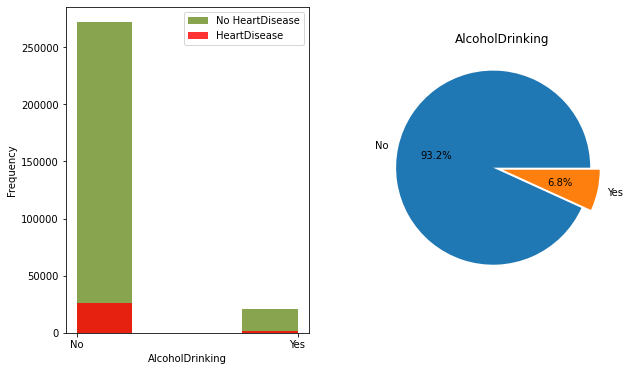

In [ ]:
# AlcoholDrinking
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

plt.hist(df[df["HeartDisease"]=='No']["AlcoholDrinking"], bins=4, alpha=0.8, color="olivedrab", label="No HeartDisease")
plt.hist(df[df["HeartDisease"]=='Yes']["AlcoholDrinking"], bins=4, alpha=0.8, color="red", label="HeartDisease")

plt.xlabel("AlcoholDrinking")
plt.ylabel("Frequency")

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['AlcoholDrinking'].value_counts().index)
value=[x for x in df['AlcoholDrinking'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("AlcoholDrinking")

In [ ]:
re = df[df["HeartDisease"]=='No']["AlcoholDrinking"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["AlcoholDrinking"].value_counts()

print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
print("No無心臟疾病：人數：%d, 比例：%.3f"%(re["No"], re["No"]/(re["No"] + re_2["No"])))

Yes有心臟疾病：人數：1141, 比例：0.052
Yes無心臟疾病：人數：20636, 比例：0.948
No有心臟疾病：人數：26232, 比例：0.088
No無心臟疾病：人數：271786, 比例：0.912


Text(0.5, 1.0, 'DiffWalking')

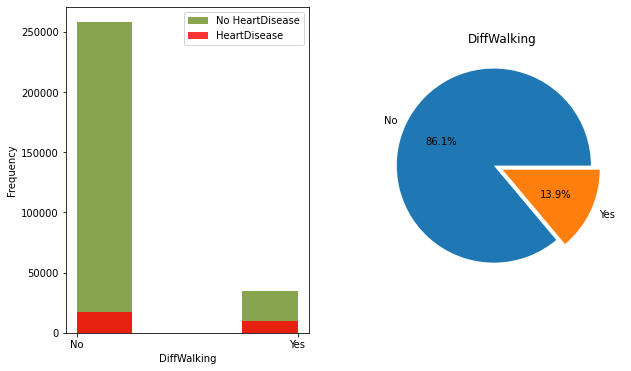

In [ ]:
# DiffWalking
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

plt.hist(df[df["HeartDisease"]=='No']["DiffWalking"], bins=4, alpha=0.8, color="olivedrab", label="No HeartDisease")
plt.hist(df[df["HeartDisease"]=='Yes']["DiffWalking"], bins=4, alpha=0.8, color="red", label="HeartDisease")

plt.xlabel("DiffWalking")
plt.ylabel("Frequency")

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['DiffWalking'].value_counts().index)
value=[x for x in df['DiffWalking'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("DiffWalking")

In [ ]:
re = df[df["HeartDisease"]=='No']["DiffWalking"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["DiffWalking"].value_counts()

print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
print("No無心臟疾病：人數：%d, 比例：%.3f"%(re["No"], re["No"]/(re["No"] + re_2["No"])))

Yes有心臟疾病：人數：10028, 比例：0.226
Yes無心臟疾病：人數：34382, 比例：0.774
No有心臟疾病：人數：17345, 比例：0.063
No無心臟疾病：人數：258040, 比例：0.937


Text(0.5, 1.0, 'Sex')

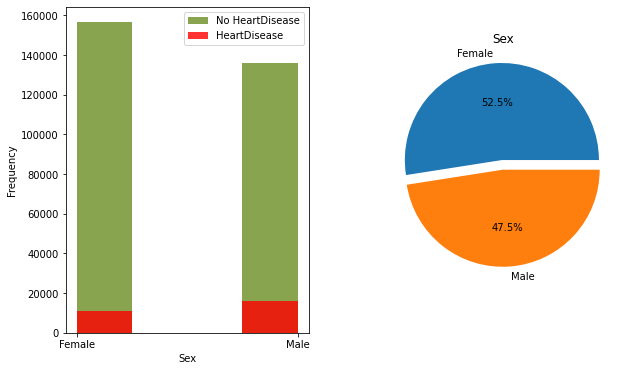

In [ ]:
# Sex
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

plt.hist(df[df["HeartDisease"]=='No']["Sex"], bins=4, alpha=0.8, color="olivedrab", label="No HeartDisease")
plt.hist(df[df["HeartDisease"]=='Yes']["Sex"], bins=4, alpha=0.8, color="red", label="HeartDisease")

plt.xlabel("Sex")
plt.ylabel("Frequency")

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['Sex'].value_counts().index)
value=[x for x in df['Sex'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("Sex")

In [ ]:
re = df[df["HeartDisease"]=='No']["Sex"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["Sex"].value_counts()

print("男有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Male"], re_2["Male"]/(re["Male"] + re_2["Male"])))
print("男無心臟疾病：人數：%d, 比例：%.3f"%(re["Male"], re["Male"]/(re["Male"] + re_2["Male"])))

print("女有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Female"], re_2["Female"]/(re["Female"] + re_2["Female"])))
print("女無心臟疾病：人數：%d, 比例：%.3f"%(re["Female"], re["Female"]/(re["Female"] + re_2["Female"])))

男有心臟疾病：人數：16139, 比例：0.106
男無心臟疾病：人數：135851, 比例：0.894
女有心臟疾病：人數：11234, 比例：0.067
女無心臟疾病：人數：156571, 比例：0.933


Text(0.5, 1.0, 'PhysicalActivity')

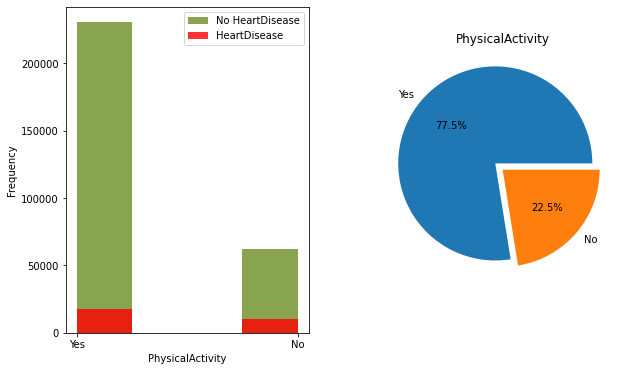

In [ ]:
# PhysicalActivity
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

plt.hist(df[df["HeartDisease"]=='No']["PhysicalActivity"], bins=4, alpha=0.8, color="olivedrab", label="No HeartDisease")
plt.hist(df[df["HeartDisease"]=='Yes']["PhysicalActivity"], bins=4, alpha=0.8, color="red", label="HeartDisease")

plt.xlabel("PhysicalActivity")
plt.ylabel("Frequency")

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['PhysicalActivity'].value_counts().index)
value=[x for x in df['PhysicalActivity'].value_counts()]
explode = [0.1, 0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("PhysicalActivity")

In [ ]:
re = df[df["HeartDisease"]=='No']["PhysicalActivity"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["PhysicalActivity"].value_counts()

print("Yes有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Yes"], re_2["Yes"]/(re["Yes"] + re_2["Yes"])))
print("Yes無心臟疾病：人數：%d, 比例：%.3f"%(re["Yes"], re["Yes"]/(re["Yes"] + re_2["Yes"])))

print("No有心臟疾病：人數：%d, 比例：%.3f"%(re_2["No"], re_2["No"]/(re["No"] + re_2["No"])))
print("No無心臟疾病：人數：%d, 比例：%.3f"%(re["No"], re["No"]/(re["No"] + re_2["No"])))

Yes有心臟疾病：人數：17489, 比例：0.071
Yes無心臟疾病：人數：230468, 比例：0.929
No有心臟疾病：人數：9884, 比例：0.138
No無心臟疾病：人數：61954, 比例：0.862


Text(0.5, 1.0, 'GenHealth')

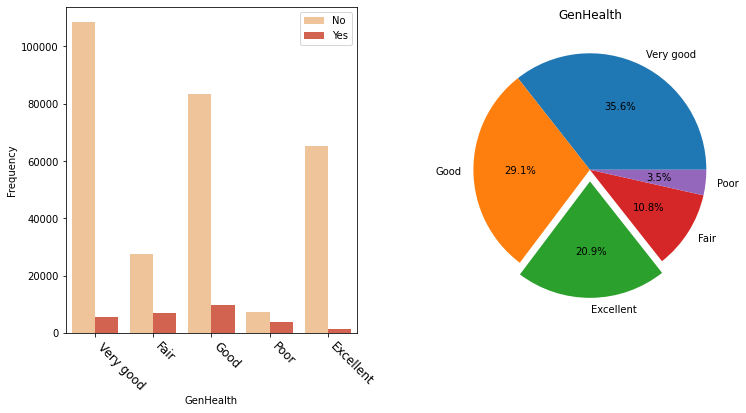

In [ ]:
# GenHealth
fig ,ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize = (12,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #設定子圖的間隔
plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(figsize = (8,6))

# plt.figure(figsize = (12,6))
sns.countplot(x = df['GenHealth'], hue = 'HeartDisease', data = df, palette = 'OrRd')
plt.xlabel('GenHealth')
plt.ylabel('Frequency')
plt.xticks( rotation=-45,  horizontalalignment='left', fontsize=12)

plt.legend()

plt.subplot(1, 2, 2)
count = np.array(df['GenHealth'].value_counts().index)
value=[x for x in df['GenHealth'].value_counts()]
explode = [0, 0, 0.1, 0 ,0]
plt.pie(value, labels=count, explode=explode, autopct= "%3.1f%%")
plt.title("GenHealth")

In [ ]:
re = df[df["HeartDisease"]=='No']["GenHealth"].value_counts()
re_2 = df[df["HeartDisease"]=='Yes']["GenHealth"].value_counts()

print("Excellent有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Excellent"], re_2["Excellent"]/(re["Excellent"] + re_2["Excellent"])))
print("Very good有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Very good"], re_2["Very good"]/(re["Very good"] + re_2["Very good"])))
print("Good有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Good"], re_2["Good"]/(re["Good"] + re_2["Good"])))
print("Fair有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Fair"], re_2["Fair"]/(re["Fair"] + re_2["Fair"])))
print("Poor有心臟疾病：人數：%d, 比例：%.3f"%(re_2["Poor"], re_2["Poor"]/(re["Poor"] + re_2["Poor"])))

Excellent有心臟疾病：人數：1500, 比例：0.022
Very good有心臟疾病：人數：5381, 比例：0.047
Good有心臟疾病：人數：9558, 比例：0.103
Fair有心臟疾病：人數：7084, 比例：0.204
Poor有心臟疾病：人數：3850, 比例：0.341


### **清理類別型變數**

In [ ]:
# 依序分析類別特徵的種類個數
length = len(df_cat.columns)
for i in range(1,length+1):
  print("%d. 分析%s值"%(i, df_cat.columns[i-1]))
  print(df_cat.iloc[:, i-1:i].astype('category').value_counts())
  print("===================================")

1. 分析Smoking值
Smoking
No         187887
Yes        131908
dtype: int64
2. 分析AlcoholDrinking值
AlcoholDrinking
No                 298018
Yes                 21777
dtype: int64
3. 分析Stroke值
Stroke
No        307726
Yes        12069
dtype: int64
4. 分析DiffWalking值
DiffWalking
No             275385
Yes             44410
dtype: int64
5. 分析Sex值
Sex   
Female    167805
Male      151990
dtype: int64
6. 分析Race值
Race                          
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
dtype: int64
7. 分析Diabetic值
Diabetic               
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
dtype: int64
8. 分析PhysicalActivity值
PhysicalActivity
Yes                 247957
No                   71838
dtype: int64
9. 分析GenHeal

In [ ]:
df_onehot = df_cat.loc[:,:]
df_onehot["HeartDisease"] = df["HeartDisease"]
yesOrNo_mapping = {"Yes":1, "No":0}

for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    df_onehot[col] = df[col].map(yesOrNo_mapping)
sex_mapping={"Female":1, "Male":0}
df_onehot["Sex"] = df["Sex"].map(sex_mapping)
GenHealth_mapping = {"Excellent":5, "Very good":4, "Good":3, "Fair":2, "Poor":1}
df_onehot['GenHealth'] = df['GenHealth'].map(GenHealth_mapping)

df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Smoking           319795 non-null  int64 
 1   AlcoholDrinking   319795 non-null  int64 
 2   Stroke            319795 non-null  int64 
 3   DiffWalking       319795 non-null  int64 
 4   Sex               319795 non-null  int64 
 5   Race              319795 non-null  object
 6   Diabetic          319795 non-null  object
 7   PhysicalActivity  319795 non-null  int64 
 8   GenHealth         319795 non-null  int64 
 9   Asthma            319795 non-null  int64 
 10  KidneyDisease     319795 non-null  int64 
 11  SkinCancer        319795 non-null  int64 
 12  HeartDisease      319795 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 31.7+ MB


In [ ]:
# 類別型變數使用one-hot編碼
temp = df_onehot
df_onehot = pd.get_dummies(df_cat, drop_first=True)
temp = df_onehot

df_onehot = df_onehot.drop(['HeartDisease'], axis=1)
df_onehot["HeartDisease"] = temp["HeartDisease"]
df_onehot.info()
df_onehot
# df_onehot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   Smoking                           319795 non-null  int64
 1   AlcoholDrinking                   319795 non-null  int64
 2   Stroke                            319795 non-null  int64
 3   DiffWalking                       319795 non-null  int64
 4   Sex                               319795 non-null  int64
 5   PhysicalActivity                  319795 non-null  int64
 6   GenHealth                         319795 non-null  int64
 7   Asthma                            319795 non-null  int64
 8   KidneyDisease                     319795 non-null  int64
 9   SkinCancer                        319795 non-null  int64
 10  Race_Asian                        319795 non-null  uint8
 11  Race_Black                        319795 non-null  uint8
 12  Race_Hispanic   

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),HeartDisease
0,1,0,0,0,1,1,4,1,0,1,0,0,0,0,1,0,1,0,0
1,0,0,1,0,1,1,4,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,3,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,1,4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0,0,1,0,0,2,1,0,0,0,0,1,0,0,0,1,0,1
319791,1,0,0,0,0,1,4,1,0,0,0,0,1,0,0,0,0,0,0
319792,0,0,0,0,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0
319793,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime', "Age"]
Scaler = StandardScaler()
df_num_stdd = pd.DataFrame()
df_num_stdd[num_cols] = Scaler.fit_transform(df[num_cols])
df_num_stdd

,MentalHealth,BMI,PhysicalHealth,SleepTime,Age
0,3.281069,-1.844750,-0.046751,-1.460354,0.149220
1,-0.490039,-1.256338,-0.424070,-0.067601,1.447159
2,3.281069,-0.274603,2.091388,0.628776,0.713541
3,-0.490039,-0.647473,-0.424070,-0.763977,1.277863
4,-0.490039,-0.726138,3.097572,0.628776,-0.697262
...,...,...,...,...,...
319790,-0.490039,-0.144019,0.456341,-0.763977,0.431381
319791,-0.490039,0.238291,-0.424070,-1.460354,-0.979422
319792,-0.490039,-0.642753,-0.424070,-0.763977,-0.415101
319793,-0.490039,0.705560,-0.424070,3.414282,-1.543744


In [ ]:
# df_num_stdd.iloc[:,:].describe()
df_num_stdd.iloc[:,:].var()

MentalHealth      1.000003
BMI               1.000003
PhysicalHealth    1.000003
SleepTime         1.000003
Age               1.000003
dtype: float64

In [ ]:
df_onehot

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),HeartDisease
0,1,0,0,0,1,1,4,1,0,1,0,0,0,0,1,0,1,0,0
1,0,0,1,0,1,1,4,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,3,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,1,4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0,0,1,0,0,2,1,0,0,0,0,1,0,0,0,1,0,1
319791,1,0,0,0,0,1,4,1,0,0,0,0,1,0,0,0,0,0,0
319792,0,0,0,0,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0
319793,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# 將變數分為數值型及類別型
df_cat = df.select_dtypes(include=['object'])
df_cat = df_cat.drop(['HeartDisease'], axis=1)
df_cat = df_cat.drop(['AgeCategory'], axis=1)
df_cat

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,No,No,Yes,Male,Hispanic,Yes,No,Fair,Yes,No,No
319791,Yes,No,No,No,Male,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,Female,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,Female,Hispanic,No,No,Good,No,No,No


### **二、敘述性統計分析**



In [ ]:
df_num.iloc[:,:].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Age
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075,54.355759
std,6.356100,7.95085,7.955235,1.436007,17.720429
min,12.020000,0.00000,0.000000,1.000000,21.000000
25%,24.030000,0.00000,0.000000,6.000000,42.000000
50%,27.340000,0.00000,0.000000,7.000000,57.000000
75%,31.420000,2.00000,3.000000,8.000000,67.000000
max,94.850000,30.00000,30.000000,24.000000,80.000000


In [ ]:
# IQR
def iqr(x):
  q1, q3 = np.percentile(x, [25, 75])
  IQR = q3 - q1
  # lower_bound = q1 - 1.5*IQR
  # upper_bound = q3 + 1.5*IQR
  # return upper_bound - lower_bound
  return IQR
for i in df_num.columns:
  print(i, "：", iqr(df_num[i]))

BMI ： 7.390000000000001
PhysicalHealth ： 2.0
MentalHealth ： 3.0
SleepTime ： 2.0
Age ： 25.0


In [ ]:
# var
for i in df_num.columns:
  print(i, "：", df_num[i].var())

BMI ： 40.40000975843409
PhysicalHealth ： 63.21601862574591
MentalHealth ： 63.28576738877206
SleepTime ： 2.0621162791467267
Age ： 314.01361901939043


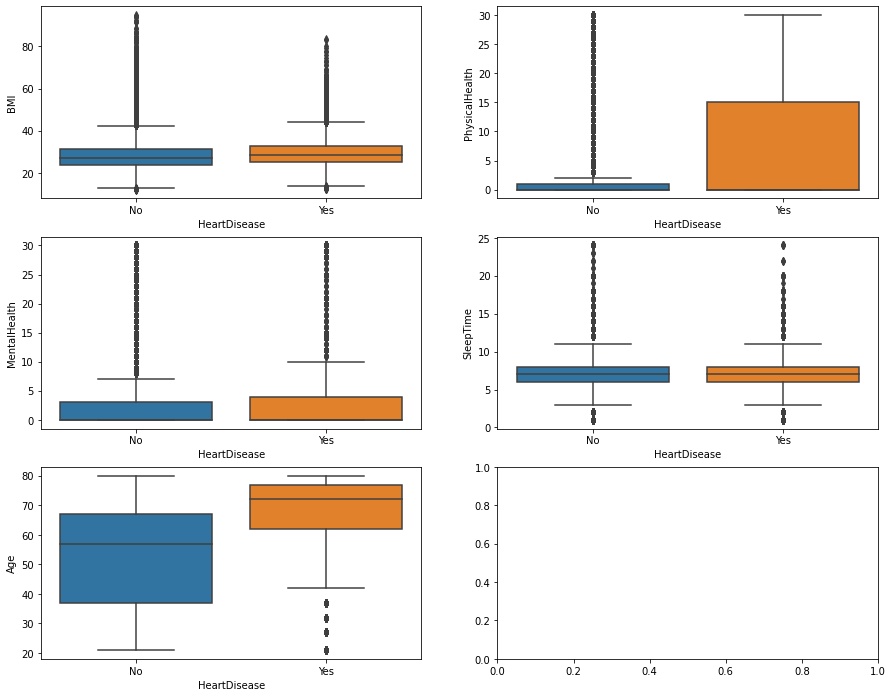

In [ ]:
# 盒鬚圖
fig , ax = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(15,12))
for i in range(1,6):
  plt.subplot(3,2,i)
  sns.boxplot(x = "HeartDisease", y = labelnum[i-1], data = df)

plt.show()

In [ ]:
# 卡方獨立性檢定
# 看男與女，其心臟疾病是否有差別
# H0:兩者沒差異
from scipy import stats
df_new = pd.DataFrame(columns=['M', 'F'], index=['Yes', 'No'])
a = df[df["HeartDisease"]=='Yes']["Sex"].value_counts()
b = df[df["HeartDisease"]=='No']["Sex"].value_counts()
df_new.loc['Yes', "M"] = a['Male']
df_new.loc['No', "M"] = b['Male']
df_new.loc['Yes', "F"] = a['Female']
df_new.loc['No', "F"] = b['Female']
df_new
chi2, p_val = stats.chisquare(f_obs=[16139, 11234],f_exp=[135851, 156571])
print(chi2)  # 卡方統計量
print(p_val) # p值
# count = np.array(df['Sex'].value_counts())
# count

# df_onehot['Sex'].sum()

240399.34316895038
0.0


In [ ]:
# 卡方獨立性檢定
# 看男與女，其心臟疾病是否有差別
# H0:兩者沒差異
from scipy import stats
df_new = pd.DataFrame(columns=['Asthma_Yes', 'Asthma_No'], index=['Yes', 'No'])
a = df[df["HeartDisease"]=='Yes']["Asthma"].value_counts()
b = df[df["HeartDisease"]=='No']["Asthma"].value_counts()

df_new.loc['Yes', "Asthma_Yes"] = a['Yes']
df_new.loc['No', "Asthma_Yes"] = b['Yes']
df_new.loc['Yes', "Asthma_No"] = a['No']
df_new.loc['No', "Asthma_No"] = b['No']
df_new
chi2, p_val = stats.chisquare(f_obs=[4933, 22440],f_exp=[37939, 254483])
print(chi2)  # 卡方統計量
print(p_val)

240296.14270448784
0.0


### **三、特徵相關性分析**

In [ ]:
# 數值型變數的相關係數
df_corr_num = df_num
df_corr_num["HeartDisease"] = df_onehot["HeartDisease"]

corr = df_corr_num.loc[:,:].corr()
corr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BMI,PhysicalHealth,MentalHealth,SleepTime,Age,HeartDisease
BMI,1.000000,0.109788,0.064131,-0.051822,-0.000446,0.051803
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387,0.111010,0.170721
MentalHealth,0.064131,0.287987,1.000000,-0.119717,-0.155327,0.028591
SleepTime,-0.051822,-0.061387,-0.119717,1.000000,0.102700,0.008327
Age,-0.000446,0.111010,-0.155327,0.102700,1.000000,0.231583
HeartDisease,0.051803,0.170721,0.028591,0.008327,0.231583,1.000000


In [ ]:
df_corr_cat = df_onehot
corr = df_corr_cat.loc[:,:].corr()
corr

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),HeartDisease
Smoking,1.000000,0.111768,0.061226,0.120074,-0.085052,-0.097174,-0.174717,0.024149,0.034920,0.033977,-0.060308,-0.038249,-0.066873,0.016205,0.072367,0.007143,0.058434,-0.005385,0.107764
AlcoholDrinking,0.111768,1.000000,-0.019858,-0.035328,-0.004200,0.017487,0.029780,-0.002202,-0.028280,-0.005702,-0.022275,-0.025980,-0.015554,0.005455,0.033342,-0.008165,-0.058208,-0.004077,-0.032080
Stroke,0.061226,-0.019858,1.000000,0.174143,0.003091,-0.079455,-0.168090,0.038866,0.091167,0.048116,-0.016060,0.024819,-0.025823,0.005743,0.001154,0.011172,0.108407,-0.004526,0.196835
DiffWalking,0.120074,-0.035328,0.174143,1.000000,0.068860,-0.278524,-0.413797,0.103222,0.153064,0.064840,-0.038830,0.039615,-0.008214,0.008483,-0.015516,0.031843,0.216605,-0.007040,0.201258
Sex,-0.085052,-0.004200,0.003091,0.068860,1.000000,-0.048247,-0.025947,0.069191,0.009084,-0.013434,-0.013716,0.037280,0.003607,-0.008762,-0.017314,0.004295,-0.020718,0.085477,-0.070040
PhysicalActivity,-0.097174,0.017487,-0.079455,-0.278524,-0.048247,1.000000,0.281249,-0.041526,-0.081827,-0.001328,0.012106,-0.043701,-0.056564,0.001808,0.064172,-0.017253,-0.140571,0.001501,-0.100030
GenHealth,-0.174717,0.029780,-0.168090,-0.413797,-0.025947,0.281249,1.000000,-0.137342,-0.174642,-0.050641,0.032701,-0.062215,-0.028721,-0.015241,0.062656,-0.047783,-0.276990,-0.001201,-0.243182
Asthma,0.024149,-0.002202,0.038866,0.103222,0.069191,-0.041526,-0.137342,1.000000,0.039707,-0.000396,-0.017007,0.021297,0.003885,0.028037,-0.025421,0.016750,0.044565,0.013282,0.041444
KidneyDisease,0.034920,-0.028280,0.091167,0.153064,0.009084,-0.081827,-0.174642,0.039707,1.000000,0.061816,-0.016957,0.010300,-0.010960,-0.002057,0.005933,0.004982,0.154268,-0.004706,0.145197
SkinCancer,0.033977,-0.005702,0.048116,0.064840,-0.013434,-0.001328,-0.050641,-0.000396,0.061816,1.000000,-0.047749,-0.083390,-0.082360,-0.031905,0.144862,0.006025,0.037663,-0.010092,0.093317


[Text(0.5, 0, 'BMI'),
 Text(1.5, 0, 'PhysicalHealth'),
 Text(2.5, 0, 'MentalHealth'),
 Text(3.5, 0, 'SleepTime'),
 Text(4.5, 0, 'Age'),
 Text(5.5, 0, 'HeartDisease')]

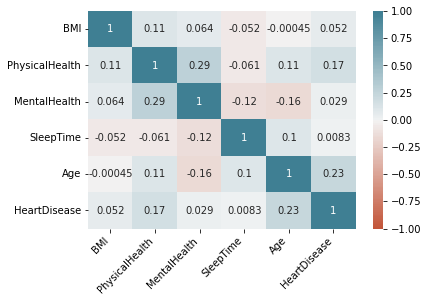

In [ ]:
# 數值型熱點圖
corr = df_corr_num.loc[:,:].corr()

ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'Smoking'),
 Text(1.5, 0, 'AlcoholDrinking'),
 Text(2.5, 0, 'Stroke'),
 Text(3.5, 0, 'DiffWalking'),
 Text(4.5, 0, 'Sex'),
 Text(5.5, 0, 'PhysicalActivity'),
 Text(6.5, 0, 'GenHealth'),
 Text(7.5, 0, 'Asthma'),
 Text(8.5, 0, 'KidneyDisease'),
 Text(9.5, 0, 'SkinCancer'),
 Text(10.5, 0, 'Race_Asian'),
 Text(11.5, 0, 'Race_Black'),
 Text(12.5, 0, 'Race_Hispanic'),
 Text(13.5, 0, 'Race_Other'),
 Text(14.5, 0, 'Race_White'),
 Text(15.5, 0, 'Diabetic_No, borderline diabetes'),
 Text(16.5, 0, 'Diabetic_Yes'),
 Text(17.5, 0, 'Diabetic_Yes (during pregnancy)'),
 Text(18.5, 0, 'HeartDisease')]

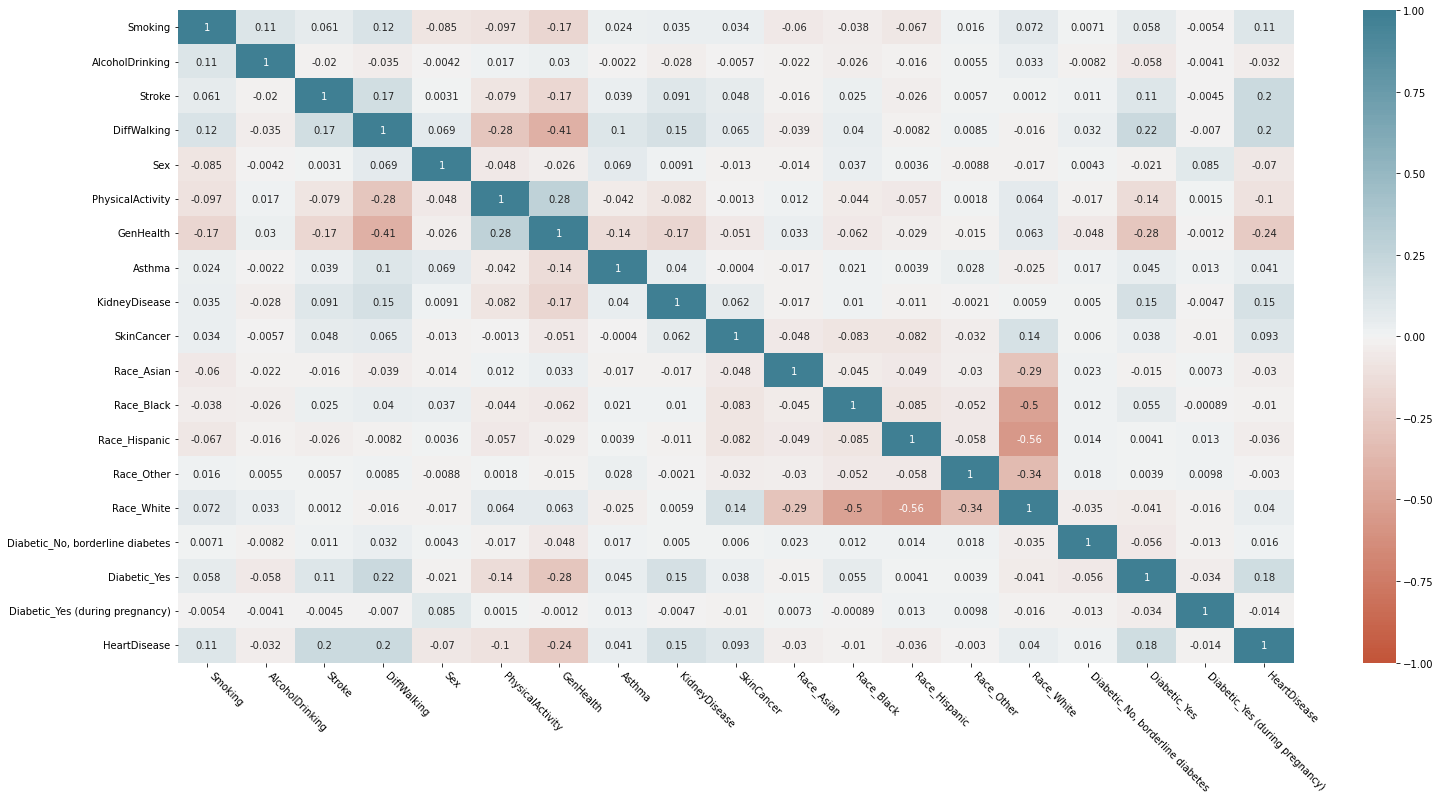

In [ ]:
# 類別型熱點圖
corr = df_corr_cat.loc[:,:].corr()
plt.figure(figsize=(25,12))
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=-45,
    horizontalalignment='left'
)

In [ ]:
# 變異膨脹因子
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = pd.DataFrame()
t = pd.DataFrame()
t=df_num.loc[:,:]
t['constant'] = 1
df_vif['feature'] = t.columns
df_vif['VIF'] = [variance_inflation_factor(t.values, i)
                        for i in range(t.shape[1])]

df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,feature,VIF
0,BMI,1.016550
1,PhysicalHealth,1.152914
2,MentalHealth,1.144485
3,SleepTime,1.025748
4,Age,1.114576
5,HeartDisease,1.082972


In [ ]:
df_onehot.columns

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'HeartDisease'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

X = df_onehot.loc[:, 'Smoking':'Diabetic_Yes (during pregnancy)'] 
y = df_onehot['HeartDisease']
# 以邏輯斯迴歸預測是否有雙屬性
model = LogisticRegression()
selector = RFECV(model, step=1, cv=5, scoring='accuracy')
selector = selector.fit(X, y)

print('最佳特徵數：', selector.n_features_)
print('哪些類型最佳：', selector.support_)
print('特徵排名(1最好)：', selector.ranking_)
X.columns[selector.support_]

最佳特徵數： 18
哪些類型最佳： [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
特徵排名(1最好)： [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)'],
      dtype='object')

### **四、資料分割與建置4個分類模型**

### **五、綜合比較4個模型的分類結果與分析討論**

### **切割資料集**

In [ ]:
df_onehot.shape

(319795, 19)

In [ ]:
# ["BMI", "PhysicalHealth", "SleepTime", "Age"]
feature = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)']
df_used = df.loc[:, ["BMI", "PhysicalHealth", "SleepTime", "Age"]]

for i in feature:
  df_used[i] = df_onehot[i]
df_used

,BMI,PhysicalHealth,SleepTime,Age,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,...,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,16.60,3.0,5.0,57,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,20.34,0.0,7.0,80,0,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,26.58,20.0,8.0,67,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,24.21,0.0,6.0,77,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,23.71,28.0,8.0,42,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,6.0,62,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
319791,29.84,0.0,5.0,37,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
319792,24.24,0.0,6.0,47,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
319793,32.81,0.0,12.0,27,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
print('心臟疾病的數量：', df_onehot['HeartDisease'].sum())
print('沒有心臟疾病的數量：', df.shape[0]-df_onehot['HeartDisease'].sum())

心臟疾病的數量： 27373
沒有心臟疾病的數量： 292422


In [ ]:
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

In [ ]:
df_used.columns

Index(['BMI', 'PhysicalHealth', 'SleepTime', 'Age', 'Smoking',
       'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)'],
      dtype='object')

### **邏輯斯迴歸**

初步模型

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# X, y = df.loc[:, ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Age']], df_onehot['HeartDisease']
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)
print('|有心臟疾病|/|訓練集| =', y_train.sum()/y_train.size)
print('|無心臟疾病|/|訓練集| =', (0.8*df.shape[0]-y_train.sum())/y_train.size)

print('|有心臟疾病|/|測試集| =', y_test.sum()/y_test.size)
print('|無心臟疾病|/|測試集| =', (0.2*df.shape[0]-y_test.sum())/y_test.size)
print("訓練集")
print(y_train.value_counts())
print("測試集")
print(y_test.value_counts())
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.score(X_test, y_test)

|有心臟疾病|/|訓練集| = 0.08559389608968246
|無心臟疾病|/|訓練集| = 0.9144061039103175
|有心臟疾病|/|測試集| = 0.08560171359777358
|無心臟疾病|/|測試集| = 0.9143982864022264
訓練集
0    233938
1     21898
Name: HeartDisease, dtype: int64
測試集
0    58484
1     5475
Name: HeartDisease, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9148829719038759

In [ ]:
# 邏輯斯迴歸擬合類別不平衡數據
logit = LogisticRegression().fit(X_train, y_train)
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.51      0.12      0.20      5475

    accuracy                           0.91     63959
   macro avg       0.72      0.56      0.58     63959
weighted avg       0.89      0.91      0.89     63959



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


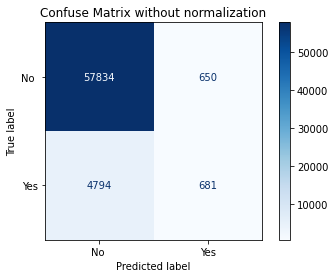

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(logit, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid(False)

In [ ]:
# 計算分類錯誤的數量
y_pred = logit.predict(X_train)
print('Misclassified samples: %d' % (y_train != y_pred).sum())

處理類別不平衡

In [ ]:
# 邏輯斯迴歸加上 class_weight='balanced'
logit = LogisticRegression(class_weight='balanced')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))
print(logit.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58484
           1       0.23      0.78      0.35      5475

    accuracy                           0.76     63959
   macro avg       0.60      0.77      0.60     63959
weighted avg       0.91      0.76      0.81     63959

0.75526509169937


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


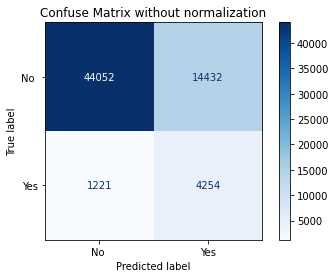

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(logit, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid(False)

### **放回式取樣**

In [ ]:
from sklearn.utils import resample

print(y_train.value_counts())
# 對類別1(YES有心臟疾病)進行放回式取樣
size = y_train[y_train == 0].shape[0]
X_up, y_up = resample(X_train[y_train == 1], 
                      y_train[y_train == 1], 
                      replace=True, 
                      n_samples=size, 
                      random_state=0)
X_train_up = np.vstack((X_train[y_train==0], X_up))
y_train_up = np.hstack((y_train[y_train==0], y_up))
print('Class 0:', len(y_train_up) - y_train_up.sum())
print('Class 1:', y_train_up.sum())

0    233938
1     21898
Name: HeartDisease, dtype: int64
Class 0: 233938
Class 1: 233938


In [ ]:
# 測試集
from sklearn.utils import resample

print(y_test.value_counts())
# 對類別1(YES有心臟疾病)進行放回式取樣
size = y_test[y_test == 0].shape[0]
X_test_up, y_test_up = resample(X_test[y_test == 1], 
                      y_test[y_test == 1], 
                      replace=True, 
                      n_samples=size, 
                      random_state=0)
X_test_up = np.vstack((X_test[y_test==0], X_test_up))
y_test_up = np.hstack((y_test[y_test==0], y_test_up))
print('Class 0:', len(y_test_up) - y_test_up.sum())
print('Class 1:', y_test_up.sum())

0    58484
1     5475
Name: HeartDisease, dtype: int64
Class 0: 58484
Class 1: 58484


In [ ]:
# 邏輯斯迴歸擬合經過上取樣的數據 X_train_up
logit = LogisticRegression()
logit.fit(X_train_up, y_train_up)
y_pred = logit.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85     45187
           1       0.78      0.23      0.35     18772

    accuracy                           0.75     63959
   macro avg       0.76      0.60      0.60     63959
weighted avg       0.76      0.75      0.70     63959



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# 邏輯斯迴歸擬合經過上取樣的數據 X_train X_test_up
logit = LogisticRegression()
logit.fit(X_train_up, y_train_up)
y_pred = logit.predict(X_test_up)
print(classification_report(y_pred, y_test_up))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.75      0.77      0.76     56913
           1       0.78      0.76      0.77     60055

    accuracy                           0.77    116968
   macro avg       0.77      0.77      0.77    116968
weighted avg       0.77      0.77      0.77    116968



加平衡

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)
score_record=[]
c_record=[]
p_record=[]

best_score = 0
# 以巢狀迴圈測試超參數組合
for p in ['l1', 'l2']:
    # for c in [.001, .01, .1, 1, 10, 100]:
    for c in np.logspace(-4, 2, 10):
        # solver 改為 saga，同時應用到 L1, L2
        # max_iter 改為 1500，期待能盡量得到收斂結果
        logit = LogisticRegression(class_weight='balanced', penalty=p, C=c, solver='saga', max_iter=1500)
        logit.fit(X_train, y_train)
        score = logit.score(X_test, y_test)
        print("penalty=", p)
        print("c=", c)
        print("score=", score)
        print("=====================================")
        print("\n")
        score_record.append(score)
        c_record.append(c)
        p_record.append(p)
        
        if score > best_score:
            best_score = score
            best_param = {'penalty':p, 'C':c}

print('Best score: %.3f' % best_score)
print('Best parameters:', best_param)

penalty= l1
c= 0.0001
score= 0.6986976031520192


penalty= l1
c= 0.00046415888336127773
score= 0.730890101471255


penalty= l1
c= 0.002154434690031882
score= 0.7487921949999218


penalty= l1
c= 0.01
score= 0.7516377679450899


penalty= l1
c= 0.046415888336127774
score= 0.7523569786894729


penalty= l1
c= 0.21544346900318823
score= 0.7523569786894729


penalty= l1
c= 1.0
score= 0.752294438624744


penalty= l1
c= 4.641588833612772
score= 0.7522631685923795


penalty= l1
c= 21.54434690031882
score= 0.752294438624744


penalty= l1
c= 100.0
score= 0.752294438624744


penalty= l2
c= 0.0001
score= 0.7279194483966291


penalty= l2
c= 0.00046415888336127773
score= 0.7444300254850764


penalty= l2
c= 0.002154434690031882
score= 0.7503713316343282


penalty= l2
c= 0.01
score= 0.7517941181069122


penalty= l2
c= 0.046415888336127774
score= 0.752294438624744


penalty= l2
c= 0.21544346900318823
score= 0.7522788036085617


penalty= l2
c= 1.0
score= 0.7522788036085617


penalty= l2
c= 4.6415888336127

### **交叉驗證**

class_weight='balanced'
penalty= l1
c= 0.21544346900318823

In [ ]:
from sklearn.linear_model import LogisticRegression
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)
logit = LogisticRegression(class_weight='balanced', penalty="l1", C=0.21544346900318823, solver='saga', max_iter=1500)
logit.fit(X_train, y_train)
from sklearn.metrics import classification_report
# 產生分類報告
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))
print("訓練集的模型分數：", logit.score(X_train, y_train))
print("測試集的模型分數：", logit.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58484
           1       0.23      0.78      0.35      5475

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959

訓練集的模型分數： 0.7499061899029066
測試集的模型分數： 0.7523726137056552


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


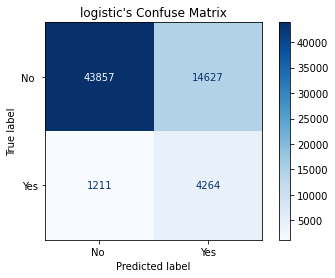

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(logit, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('logistic\'s Confuse Matrix')
plt.grid(False)

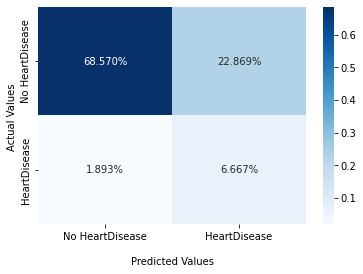

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.3%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

In [ ]:
from sklearn.metrics import average_precision_score

y_score = logit.decision_function(X_test)

# 計算 AP 值
ap = average_precision_score(y_test, y_score)
print('Average precision-recall score:', ap)

Average precision-recall score: 0.34619646359394407


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


AUC： 0.8411599004247035


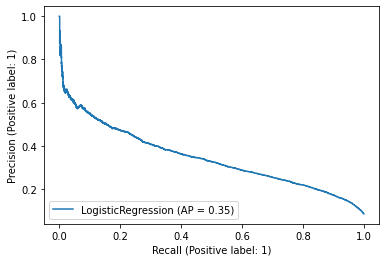

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(logit, X_test, y_test)

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("AUC：", roc_auc)

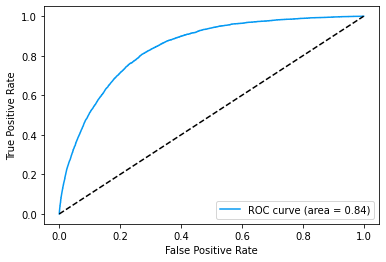

In [ ]:
plt.plot(fpr, tpr, color='xkcd:azure', 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

param_range = np.logspace(-4, 2, 10)
train_scores, valid_scores = validation_curve(
    LogisticRegression(class_weight="balanced", penalty='l1', solver='saga'), 
    X_train, y_train, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

In [ ]:
print("train_scores_mean", train_scores_mean)
print("valid_scores_mean", valid_scores_mean)

train_scores_mean [0.69543119 0.72559504 0.74527823 0.7487961  0.74973898 0.74994137
 0.74997481 0.74998567 0.74998219 0.74999001]
valid_scores_mean [0.69536344 0.7255351  0.74519612 0.74887818 0.74969901 0.74994527
 0.74994136 0.74992572 0.74993745 0.74992963]


In [ ]:
print("train_scores_std", train_scores_std)
print("valid_scores_std", valid_scores_std)

train_scores_std [0.0004945  0.00042796 0.00043989 0.00040926 0.00038658 0.00040365
 0.00042606 0.00042815 0.00042198 0.00042223]
valid_scores_std [0.00414599 0.00298918 0.00290573 0.00240476 0.00248973 0.00254782
 0.0025873  0.00258499 0.00260491 0.00260795]


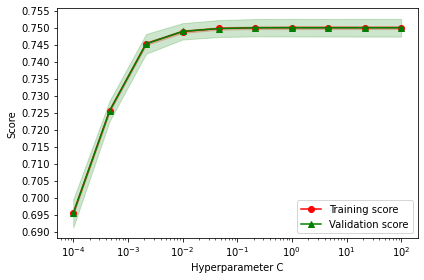

In [ ]:
plt.semilogx(param_range, train_scores_mean, 
             label="Training score", color="r", 
             marker='o')
plt.fill_between(param_range, 
                 train_scores_mean-train_scores_std,
                 train_scores_mean+train_scores_std, 
                 alpha=0.2, color="r")
plt.semilogx(param_range, valid_scores_mean, 
             label="Validation score", color="g", 
             marker='^')
plt.fill_between(param_range, 
                 valid_scores_mean-valid_scores_std,
                 valid_scores_mean+valid_scores_std, 
                 alpha=0.2, color="g")
plt.legend(loc='lower right')
plt.xlabel('Hyperparameter C')
plt.ylabel('Score')

from matplotlib.ticker import MultipleLocator

y_location = MultipleLocator(0.005)
ax = plt.gca()

ax.yaxis.set_major_locator(y_location)

plt.tight_layout()

In [ ]:
train_scores = [0.7487961, 0.74973898, 0.74994137, 0.74997481, 0.74998567, 0.74998219, 0.74999001]
valid_scores = [0.74887818, 0.74969901, 0.74994527, 0.74994136, 0.74992572, 0.74993745, 0.74992963]

In [ ]:
train_scores_s = [0.00040926, 0.00038658, 0.00040365, 0.00042606, 0.00042815, 0.00042198, 0.00042223]
valid_scores_s = [0.00240476, 0.00248973, 0.00254782, 0.0025873,  0.00258499, 0.00260491, 0.00260795]

In [ ]:
std_a=[]
std_b=[]
std_c=[]
std_d=[]
for i in range(0,7):
  a = train_scores[i]+train_scores_s[i]
  b = train_scores[i]-train_scores_s[i]
  c = valid_scores[i]+valid_scores_s[i]
  d = valid_scores[i]-valid_scores_s[i]
  std_a.append(a)
  std_b.append(b)
  std_c.append(c)
  std_d.append(d)

In [ ]:
p = [1.00000000e-02, 4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00, 2.15443469e+01, 1.00000000e+02]

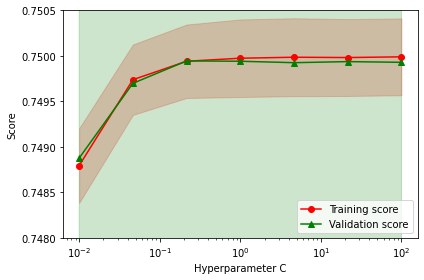

In [ ]:
plt.semilogx(p, train_scores, 
             label="Training score", color="r", 
             marker='o')
plt.fill_between(p, std_b, std_a, alpha=0.2, color="r")
plt.semilogx(p, valid_scores, label="Validation score", color="g", marker='^')
plt.fill_between(p, std_d, std_c, alpha=0.2, color="g")
plt.legend(loc='lower right')
plt.xlabel('Hyperparameter C')
plt.ylabel('Score')

from matplotlib.ticker import MultipleLocator
plt.ylim(0.748, 0.7505)
# y_location = MultipleLocator(0.00005)
ax = plt.gca()
plt.tight_layout()

沒有加平衡

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)
score_record=[]
c_record=[]
p_record=[]

best_score = 0
# 以巢狀迴圈測試超參數組合
for p in ['l1', 'l2']:
    # for c in [.001, .01, .1, 1, 10, 100]:
    for c in np.logspace(-4, 2, 10):
        # solver 改為 saga，同時應用到 L1, L2
        # max_iter 改為 1500，期待能盡量得到收斂結果
        logit = LogisticRegression(penalty=p, C=c, solver='saga', max_iter=1500)
        logit.fit(X_train, y_train)
        score = logit.score(X_test, y_test)
        print("penalty=", p)
        print("c=", c)
        print("score=", score)
        print("=====================================")
        print("\n")
        score_record.append(score)
        c_record.append(c)
        p_record.append(p)
        
        if score > best_score:
            best_score = score
            best_param = {'penalty':p, 'C':c}

print('Best score: %.3f' % best_score)
print('Best parameters:', best_param)

penalty= l1
c= 0.0001
score= 0.9143513813536797


penalty= l1
c= 0.00046415888336127773
score= 0.9139292359167591


penalty= l1
c= 0.002154434690031882
score= 0.9158210728748104


penalty= l1
c= 0.01
score= 0.915727262777717


penalty= l1
c= 0.046415888336127774
score= 0.9158210728748104


penalty= l1
c= 0.21544346900318823
score= 0.9158679779233572


penalty= l1
c= 1.0
score= 0.9157585328100815


penalty= l1
c= 4.641588833612772
score= 0.915727262777717


penalty= l1
c= 21.54434690031882
score= 0.915727262777717


penalty= l1
c= 100.0
score= 0.915727262777717


penalty= l2
c= 0.0001
score= 0.9145390015478666


penalty= l2
c= 0.00046415888336127773
score= 0.9153832924217077


penalty= l2
c= 0.002154434690031882
score= 0.9159461530042684


penalty= l2
c= 0.01
score= 0.9158367078909927


penalty= l2
c= 0.046415888336127774
score= 0.9158523429071749


penalty= l2
c= 0.21544346900318823
score= 0.9157585328100815


penalty= l2
c= 1.0
score= 0.9157116277615347


penalty= l2
c= 4.641588833612

有權重

有P, C

class_weight='balanced', penalty="l1", C=0.046415888336127774


In [ ]:
from sklearn.linear_model import LogisticRegression
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)
logit = LogisticRegression(class_weight='balanced', penalty="l1", C=0.046415888336127774, solver='saga', max_iter=1500)
logit.fit(X_train, y_train)
from sklearn.metrics import classification_report
# 產生分類報告
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))
print("訓練集的模型分數：", logit.score(X_train, y_train))
print("測試集的模型分數：", logit.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58484
           1       0.23      0.78      0.35      5475

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959

訓練集的模型分數： 0.7496325771197173
測試集的模型分數： 0.7523569786894729


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


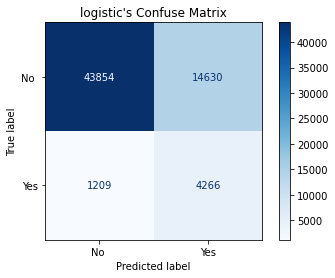

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(logit, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('logistic\'s Confuse Matrix')
plt.grid(False)

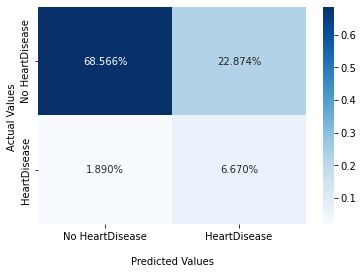

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.3%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

In [ ]:
from sklearn.metrics import average_precision_score

y_score = logit.decision_function(X_test)

# 計算 AP 值
ap = average_precision_score(y_test, y_score)
print('Average precision-recall score:', ap)

Average precision-recall score: 0.3461120764210883


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


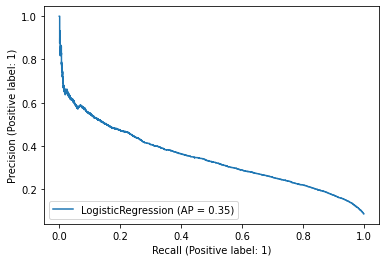

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(logit, X_test, y_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("AUC：", roc_auc)

AUC： 0.8411497224077834


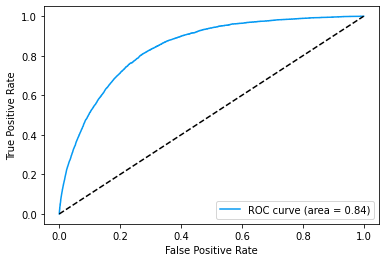

In [ ]:
plt.plot(fpr, tpr, color='xkcd:azure', 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [ ]:
# 網格搜尋
from sklearn.model_selection import GridSearchCV
logit = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
penalty = ['l1', 'l2']
# 產生 10 個 C 值
C = np.logspace(-4, 2, 10)
print(C)
hyper_param = dict(C=C, penalty=penalty)
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)
grid_s = GridSearchCV(logit, hyper_param, cv=5, verbose=1)
grid_s.fit(X_train, y_train)
print('Best score (training):', grid_s.best_score_)
print('Best parameters (training):', grid_s.best_params_)
grid_s.score(X_test, y_test)

### **SVM**

不加權重，最原始版本

In [ ]:
from sklearn.svm import LinearSVC

X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

# 建立SVM，設定最大回合數
svm = LinearSVC(max_iter=1500)
svm.fit(X_train, y_train)

from sklearn.metrics import classification_report
# 產生分類報告
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print("訓練集的模型分數：", svm.score(X_train, y_train))
print("測試集的模型分數：", svm.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.91      1.00      0.96     58484
           1       0.62      0.00      0.01      5475

    accuracy                           0.91     63959
   macro avg       0.77      0.50      0.48     63959
weighted avg       0.89      0.91      0.87     63959

訓練集的模型分數： 0.9145819978423678
測試集的模型分數： 0.9145546365640489


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


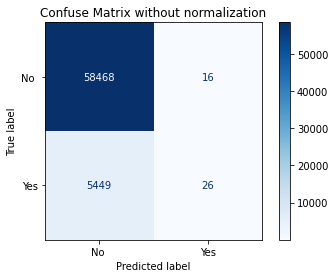

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(svm, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid(False)

LinearSVC

加權重

In [ ]:
# class_weight="balanced" 設定權重
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

svm = LinearSVC(class_weight="balanced", max_iter=1500)
svm.fit(X_train, y_train)

# 產生分類報告
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.94      0.93      0.94     58484
           1       0.35      0.39      0.37      5475

    accuracy                           0.89     63959
   macro avg       0.65      0.66      0.65     63959
weighted avg       0.89      0.89      0.89     63959

0.8855321377757626
0.8859425569505465


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


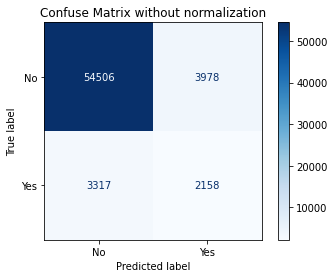

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No', 'Yes']
disp = plot_confusion_matrix(svm, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid(False)

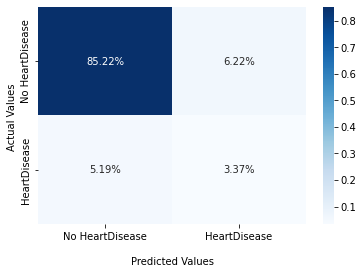

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

In [ ]:
from sklearn.metrics import average_precision_score

y_score = svm.decision_function(X_test)

# 計算 AP 值
ap = average_precision_score(y_test, y_score)
print('Average precision-recall score:', ap)

Average precision-recall score: 0.3283239709583593


In [ ]:
from sklearn.metrics import average_precision_score

# logit.fit(X_train, y_train)
y_score = svm.decision_function(X_test)

# 計算 AP 值
ap = average_precision_score(y_test, y_score)
print('Average precision-recall score: %.2f' %ap)

Average precision-recall score: 0.33


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


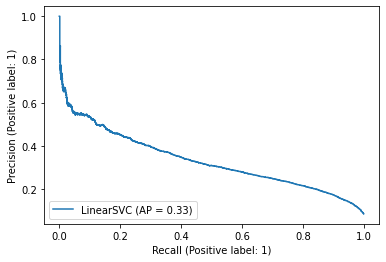

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(svm, X_test, y_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
roc_auc

0.8375198368269321

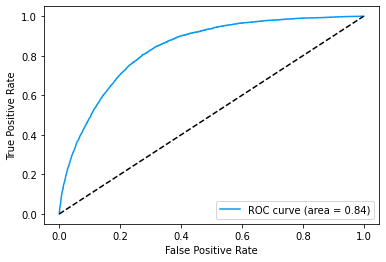

In [ ]:
plt.plot(fpr, tpr, color='xkcd:azure', 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### **加入核函數**

核函數RBF

run 11 hours

In [ ]:
from sklearn.svm import SVC


X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)
# 標準化
# scale = StandardScaler().fit(X_train)
# X_train_std = scale.transform(X_train)
# X_test_std = scale.transform(X_test)

svc = SVC(class_weight='balanced', kernel='rbf', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(svc, X_test, y_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score = svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("AUC：", roc_auc)

In [ ]:
from sklearn.metrics import average_precision_score
# 計算 AP 值
ap = average_precision_score(y_test, y_score)
print('Average precision-recall score:', ap)

In [ ]:
plt.plot(fpr, tpr, color='xkcd:azure', 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(svc, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid(False)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

### **隨機森林**

初步模型

In [ ]:
from sklearn.ensemble import RandomForestClassifier


X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.34      0.13      0.19      5475

    accuracy                           0.90     63959
   macro avg       0.63      0.55      0.57     63959
weighted avg       0.87      0.90      0.88     63959



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


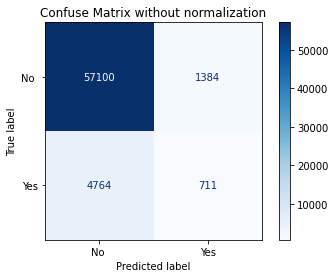

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(forest, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid(False)

放回式取樣

X_train_up

In [ ]:
from sklearn.ensemble import RandomForestClassifier


X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)
forest = RandomForestClassifier(n_jobs=-1)

# 經過回放取樣
forest.fit(X_train_up, y_train_up)
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     58484
           1       0.29      0.23      0.25      5475

    accuracy                           0.89     63959
   macro avg       0.61      0.59      0.60     63959
weighted avg       0.87      0.89      0.88     63959



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


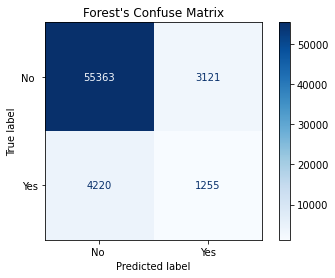

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(forest, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Forest\'s Confuse Matrix')
plt.grid(False)

(0.0, 0.6)

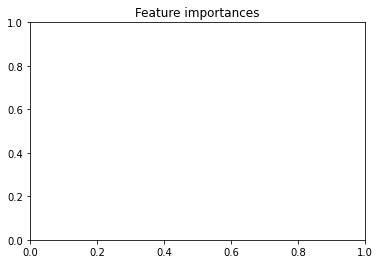

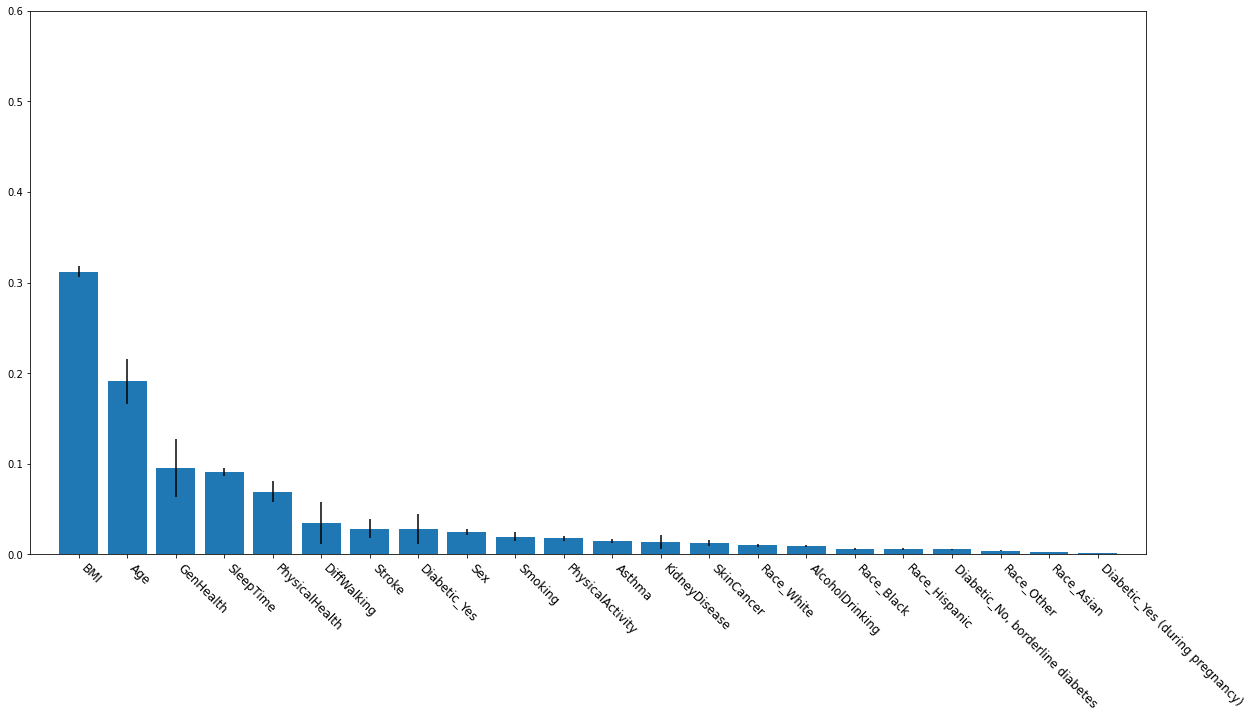

In [ ]:
importances = forest.feature_importances_
std = np.std([t.feature_importances_ for t in forest.estimators_], axis=0)
idx = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.figure(figsize=(20,10))
plt.bar(range(X.shape[1]), importances[idx], 
        yerr=std[idx], align="center")
plt.xticks(range(X.shape[1]), labels=X.columns[idx], rotation=-45,  horizontalalignment='left', fontsize=12)

plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.6])

In [ ]:
from sklearn.feature_selection import SelectFromModel

# 建立特徵選取器，門檻值預設為重要性的平均值
selector = SelectFromModel(forest)
selector.fit(X_train_up, y_train_up)
print('門檻值 =', selector.threshold_)
print('特徵遮罩：', selector.get_support())

# 選出新特徵，重新訓練隨機森林
X_train_new = selector.transform(X_train_up)
forest.fit(X_train_new, y_train_up)

X_test_new = selector.transform(X_test)
y_pred = forest.predict(X_test_new)
print(classification_report(y_test, y_pred))

門檻值 = 0.045454545454545456
特徵遮罩： [ True  True  True  True False False False False False False  True False
 False False False False False False False False False False]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       0.93      0.87      0.90     58484
           1       0.17      0.28      0.21      5475

    accuracy                           0.82     63959
   macro avg       0.55      0.57      0.55     63959
weighted avg       0.86      0.82      0.84     63959



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import make_scorer, accuracy_score
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

# 套用兩個評分指標到網格搜尋
score = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(RandomForestClassifier(random_state=0),
          param_grid={'n_estimators': range(1, 21), 
                'max_depth': [4]},
          scoring=score, refit='AUC', 
          return_train_score=True, n_jobs=-1)
gs.fit(X_train, y_train)
results = gs.cv_results_
# 取出決策樹數量作為 x 軸
X_axis = np.array(results['param_n_estimators'].data, dtype=float)
# 設定 x, y 軸刻度範圍
ax = plt.gca()
ax.set_xlim(1, 20)
ax.set_ylim(0.7, 1.0)

for scorer, color in zip(sorted(score), ['g', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
      # 取出不同評分指標的平均值與標準差
      sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
      sample_score_std = results['std_%s_%s' % (sample, scorer)]
      ax.fill_between(X_axis, 
              sample_score_mean - sample_score_std,
              sample_score_mean + sample_score_std,
              alpha=0.1 if sample == 'test' else 0, color=color)
      ax.plot(X_axis, sample_score_mean, style, color=color,
          alpha=1 if sample == 'test' else 0.7,
          label="%s (%s)" % (scorer, sample))

      
    # 取出 test 的最佳索引值與分數
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    # 標示最大值
    ax.plot([X_axis[best_index], ] * 2, [0, best_score], lw=2,
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()

In [ ]:
print(results["mean_train_Accuracy"])
print(results["mean_test_Accuracy"])
print(results["mean_train_AUC"])
print(results["mean_test_AUC"])
print(results["std_train_Accuracy"])
print(results["std_test_Accuracy"])
print(results["std_train_AUC"])
print(results["std_test_AUC"])

[0.91491033 0.9147276  0.91453509 0.91440904 0.91440904 0.91440806
 0.91441197 0.91440904 0.9144149  0.91444421 0.91443835 0.91442467
 0.91441881 0.91444519 0.91444715 0.91447548 0.91445203 0.91445594
 0.91444226 0.91447451]
[0.91489861 0.91472271 0.9144921  0.9144061  0.9144061  0.91441001
 0.91441392 0.91441392 0.91441783 0.91444519 0.91445301 0.91443737
 0.91442956 0.91445301 0.91445692 0.91447255 0.91447255 0.91445692
 0.91445692 0.91447646]
[0.77300421 0.78643475 0.80232276 0.80487966 0.81274346 0.81551862
 0.81698871 0.822393   0.82250281 0.82426603 0.82493824 0.82390131
 0.82327103 0.82382226 0.82459154 0.82512794 0.82441509 0.82573345
 0.82609017 0.82603156]
[0.7730517  0.78639097 0.8020465  0.80423313 0.81212544 0.81510347
 0.81656433 0.82201377 0.8220764  0.82386981 0.82461355 0.82346045
 0.82286188 0.82343536 0.82419598 0.82477616 0.82411865 0.82533772
 0.82568333 0.82561436]
[4.64115817e-05 2.98884833e-05 1.50659915e-04 7.19415067e-06
 7.19415067e-06 2.95967300e-06 7.114187

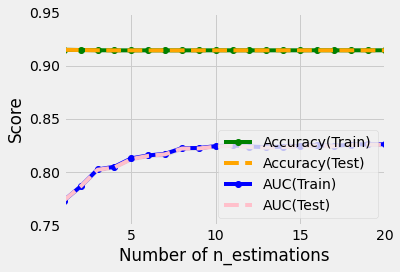

In [ ]:
X_axis = np.array(results['param_n_estimators'].data, dtype=float)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlim(1, 20, 1)
plt.ylim(0.75, 0.95, 0.1)
plt.plot(X_axis, results["mean_train_Accuracy"], 
         color='green', marker='o', 
         label='Accuracy(Train)')
plt.fill_between(X_axis, 
        results["mean_train_Accuracy"] - results["std_train_Accuracy"],
        results["mean_train_Accuracy"] - results["std_train_Accuracy"],
        color='gray', alpha=.1)

plt.plot(X_axis, results["mean_test_Accuracy"], 
         color='orange', ls = "--",
         label='Accuracy(Test)')
plt.fill_between(X_axis, 
        results["mean_test_Accuracy"]+results["std_test_Accuracy"],
        results["mean_test_Accuracy"]-results["std_test_Accuracy"],
        color='gray', alpha=.1)

plt.plot(X_axis, results["mean_train_AUC"], 
         color='blue', marker='o', 
         label='AUC(Train)')
plt.fill_between(X_axis, 
        results["mean_train_AUC"]+results["std_train_AUC"],
        results["mean_train_AUC"]-results["std_train_AUC"],
        color='gray', alpha=.1)

plt.plot(X_axis, results["mean_test_AUC"], 
         color='pink', ls = "--", 
         label='AUC(Test)')
plt.fill_between(X_axis, 
        results["mean_test_AUC"]+results["std_test_AUC"],
        results["mean_test_AUC"]-results["std_test_AUC"],
        color='gray', alpha=.1)

plt.xlabel('Number of n_estimations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

不同組合的準確率

In [ ]:
# 放回取樣
from sklearn.ensemble import RandomForestClassifier
n_est=[]
depth=[]
forest_score=[]
forest_accuracy=[]
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

for d in [3,4,5,6,7,8]:
  for n in [10,100,200,300,400,500,600,800,1000]:
    forest = RandomForestClassifier(max_depth=d, n_estimators=n, n_jobs=-1)
    forest.fit(X_train_up, y_train_up)
    y_pred = forest.predict(X_test)
    print("n_estimator", n, "maxdepth：", d)

    score=forest.score(X_test, y_test)
    forest_score.append(score)
    print("score：", score)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    forest_accuracy.append(accuracy)
    print("Accuracy：", accuracy)
    depth.append(d)
    n_est.append(n)
    print(classification_report(y_test, y_pred))
    print("===================================================")

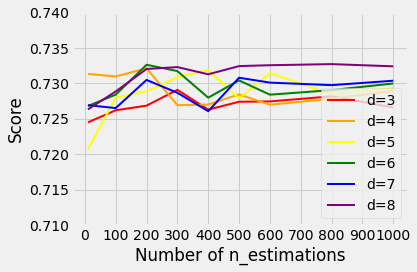

In [ ]:
# Loop得到各組合的分數視覺化圖表
from matplotlib.ticker import MultipleLocator

depth=[3,4,5,6,7,8]
num=[10,100,200,300,400,500,600,800,1000]
score_3=[0.7244953798527182, 0.7261995966165825, 0.7268562672962366, 0.7290920746102972, 0.7262934067136759, 
    0.7274034928626151, 0.7274503979111618, 0.7281696086555449, 0.7266061070373208]
score_4=[0.7313278819243578, 0.7309839115683485, 0.7321252677496521, 0.7269188073609656, 0.7270126174580591, 
    0.7284510389468253, 0.7269813474256945, 0.7278256382995356, 0.7289357244484748]
score_5=[0.7206960709204334, 0.7279976234775403, 0.7288888193999281, 0.7308744664550728, 0.7318907425069185, 
    0.7278881783642646, 0.731468597069998, 0.7284510389468253, 0.7293578698853953]
score_6=[0.7268093622476899, 0.7284041338982786, 0.7326255882674838, 0.7317343923450961, 0.7279819884613581, 
    0.7304210509857878, 0.7284041338982786, 0.7290451695617505, 0.729983270532685]
score_7=[0.7269188073609656, 0.7265122969402273, 0.7304835910505167, 0.7286699291733767, 0.7260745164871245, 
    0.7307962913741616, 0.730108350662143, 0.7297487452899514, 0.730374145937241]
score_8=[0.7263246767460404, 0.7288575493675636, 0.7320314576525587, 0.7322972529276568, 0.7312809768758111, 
    0.732437968073297, 0.7325630482027549, 0.7327193983645773, 0.7324066980409325]

plt.style.use('fivethirtyeight')
plt.ylim(0.71, 0.74)
plt.plot(num, score_3, color='red', label='d=3', lw=2)
plt.plot(num, score_4, color='orange', label='d=4', lw=2)
plt.plot(num, score_5, color='yellow', label='d=5', lw=2)
plt.plot(num, score_6, color='green', label='d=6', lw=2)
plt.plot(num, score_7, color='blue', label='d=7', lw=2)
plt.plot(num, score_8, color='purple', label='d=8', lw=2)

x_location = MultipleLocator(100)
y_location = MultipleLocator(0.005)
ax = plt.gca()
ax.xaxis.set_major_locator(x_location)
ax.yaxis.set_major_locator(y_location)
plt.xlabel('Number of n_estimations')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

### **depth=8 n=800**

class_weight="balanced"

X_train

In [ ]:
# 8 800  class_weight="balanced"  X_train
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

forest = RandomForestClassifier(class_weight="balanced", max_depth=8, n_estimators=800, n_jobs=-1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy：", accuracy)

print(classification_report(y_test, y_pred))
print("訓練集的模型分數：", forest.score(X_train, y_train))
print("測試集的模型分數：", forest.score(X_test, y_test))

Accuracy： 0.7307024812770682
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     58484
           1       0.21      0.80      0.34      5475

    accuracy                           0.73     63959
   macro avg       0.59      0.76      0.58     63959
weighted avg       0.91      0.73      0.79     63959

訓練集的模型分數： 0.7296471176847668
測試集的模型分數： 0.7307024812770682


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(forest, X_test, y_test)

In [ ]:
from sklearn.metrics import average_precision_score


# 計算 AP 值
ap = average_precision_score(y_test, y_score)
print('Average precision-recall score:', ap)

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("AUC：", roc_auc)

In [ ]:
plt.plot(fpr, tpr, color='xkcd:azure', 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(forest, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix')
plt.grid(False)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

### **KNN**

KNN

初步KNN模型

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# 計算accuracy  
# accuracy = metrics.accuracy_score(y_test, y_pred)
# print("Accuracy：", accuracy)

score = knn.score(X_test, y_test)
print("score：", score)

# 計算 AP 值
y_score = knn.predict_proba(X_test)[::,1]
ap = average_precision_score(y_test, y_score)
print("AP：", ap)


# 計算AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("AUC：", roc_auc)
print("============================================")
print(classification_report(y_test, y_pred))

score： 0.9061742678903673
AP： 0.17217178226519458
AUC： 0.6890368547897735
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.32      0.09      0.14      5475

    accuracy                           0.91     63959
   macro avg       0.62      0.53      0.54     63959
weighted avg       0.87      0.91      0.88     63959



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


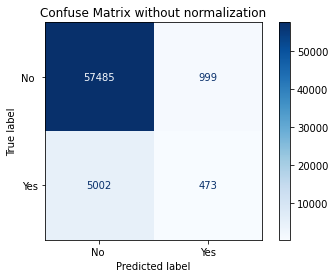

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(knn, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid(False)

### **找出k值**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

knn_ap=[]
knn_accuracy=[] 
knn_score=[]
knn_auc=[]
knn_k=[]

# 建立 KNN 分類器，預設 k=5
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

# 選擇 k
range = np.arange(1,11)

for i in range:
  print("knn；", i)
  knn_k.append(i)
  knn = KNeighborsClassifier(weights="distance", n_neighbors = i, n_jobs=-1)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  # 計算accuracy  
  accuracy = metrics.accuracy_score(y_test, y_pred)
  knn_accuracy.append(accuracy)
  print("Accuracy：", accuracy)

  score = knn.score(X_test, y_test)
  knn_score.append(score)
  print("score：", score)

  # 計算 AP 值
  y_score = knn.predict_proba(X_test)[::,1]
  ap = average_precision_score(y_test, y_score)
  print("AP：", ap)
  knn_ap.append(ap)

  # 計算AUC
  fpr, tpr, _ = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  print("AUC：", roc_auc)
  knn_auc.append(roc_auc)
  print(classification_report(y_test, y_pred))
  print("============================================")
# knn； 1
# Accuracy： 0.8722619177910849
# score： 0.8722619177910849
# AP： 0.11355223894542729
# AUC： 0.5680118497850873
# ============================================
# knn； 2
# Accuracy： 0.8754827311246267
# score： 0.8754827311246267
# AP： 0.1356666242353159
# AUC： 0.6100108088728323
# ============================================
# knn； 3
# Accuracy： 0.8929157741678263
# score： 0.8929157741678263

range = np.arange(1,11)各個準確度

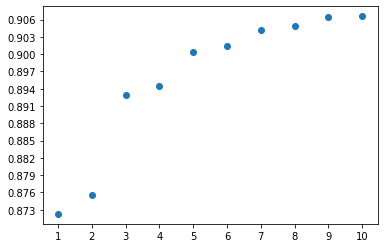

10


In [ ]:
from matplotlib.ticker import MultipleLocator
# 視覺化
range = [1,2,3,4,5,6,7,8,9,10]
knn_Accuracy = [0.8722619177910849, 0.8754827311246267, 
          0.8929157741678263, 0.8944167357213215,
          0.9003893119029378, 0.9014681280195125,
          0.9042511608999515, 0.9048921965634235,
          0.9065026032301944, 0.9065807783111055]
plt.scatter(range, knn_Accuracy)
x_location = MultipleLocator(1)
y_location = MultipleLocator(0.003)
ax = plt.gca()
ax.xaxis.set_major_locator(x_location)
ax.yaxis.set_major_locator(y_location)
plt.show()
appr_k = knn_Accuracy.index(max(knn_Accuracy)) + 1
print(appr_k)

k=6

weights="distance"

X_train

In [ ]:
# K=6 有加權重
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

# 選擇 k
range = np.arange(6,7)

for i in range:
  print("knn；", i)
  knn = KNeighborsClassifier(weights="distance", n_neighbors = i, n_jobs=-1)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  # 計算accuracy  
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy：", accuracy)

  score = knn.score(X_test, y_test)
  print("score：", score)

  # 計算 AP 值
  y_score = knn.predict_proba(X_test)[::,1]
  ap = average_precision_score(y_test, y_score)
  print("AP：", ap)


  # 計算AUC
  fpr, tpr, _ = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  print("AUC：", roc_auc)
  print("============================================")
  print(classification_report(y_test, y_pred))

knn； 6
Accuracy： 0.9014681280195125
score： 0.9014681280195125
AP： 0.18279254759790836
AUC： 0.7019894884414393
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.29      0.10      0.15      5475

    accuracy                           0.90     63959
   macro avg       0.60      0.54      0.55     63959
weighted avg       0.87      0.90      0.88     63959



k=6

沒有weights="distance"

X_train

In [ ]:
# k=6沒有加權重
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

# 選擇 k
range = np.arange(6,7)

for i in range:
  print("knn；", i)
  knn = KNeighborsClassifier(n_neighbors = i, n_jobs=-1)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  # 計算accuracy  
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy：", accuracy)

  score = knn.score(X_test, y_test)
  print("score：", score)

  # 計算 AP 值
  y_score = knn.predict_proba(X_test)[::,1]
  ap = average_precision_score(y_test, y_score)
  print("AP：", ap)


  # 計算AUC
  fpr, tpr, _ = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  print("AUC：", roc_auc)
  print("============================================")
  print(classification_report(y_test, y_pred))

knn； 6
Accuracy： 0.9120999390234369
score： 0.9120999390234369
AP： 0.18349504748484022
AUC： 0.7042132149322969
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58484
           1       0.37      0.04      0.07      5475

    accuracy                           0.91     63959
   macro avg       0.65      0.52      0.51     63959
weighted avg       0.87      0.91      0.88     63959



k=6

沒有weights="distance"

X_trian_up

In [ ]:
# k=6 沒有加權重 train_up
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

# 選擇 k
range = np.arange(6,7)

for i in range:
  print("knn；", i)
  knn = KNeighborsClassifier(n_neighbors = i, n_jobs=-1)
  knn.fit(X_train_up, y_train_up)
  y_pred = knn.predict(X_test)
  # 計算accuracy  
  # accuracy = metrics.accuracy_score(y_test, y_pred)
  # print("Accuracy：", accuracy)

  score = knn.score(X_test, y_test)
  print("score：", score)

  # 計算 AP 值
  y_score = knn.predict_proba(X_test)[::,1]
  ap = average_precision_score(y_test, y_score)
  print("AP：", ap)


  # 計算AUC
  fpr, tpr, _ = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  print("AUC：", roc_auc)
  print("============================================")
  print(classification_report(y_test, y_pred))

knn； 6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


score： 0.802420300505011


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


AP： 0.16401905595640529
AUC： 0.6977483550119784
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     58484
           1       0.20      0.44      0.28      5475

    accuracy                           0.80     63959
   macro avg       0.57      0.64      0.58     63959
weighted avg       0.88      0.80      0.83     63959



k=8

weights="distance"

X_train

In [ ]:
# k=8 train 有加權重
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

# 選擇 k
range = np.arange(8,9)

for i in range:
  print("knn；", i)
  knn = KNeighborsClassifier(weights="distance", n_neighbors = i, n_jobs=-1)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  # 計算accuracy  
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy：", accuracy)

  # score = knn.score(X_test, y_test)
  # print("score：", score)

  # 計算 AP 值
  y_score = knn.predict_proba(X_test)[::,1]
  ap = average_precision_score(y_test, y_score)
  print("AP：", ap)


  # 計算AUC
  fpr, tpr, _ = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  print("AUC：", roc_auc)
  print("============================================")
  print(classification_report(y_test, y_pred))

knn； 8
Accuracy： 0.9048921965634235
AP： 0.19520089554755046
AUC： 0.7252583995185508
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.30      0.08      0.13      5475

    accuracy                           0.90     63959
   macro avg       0.61      0.53      0.54     63959
weighted avg       0.87      0.90      0.88     63959



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


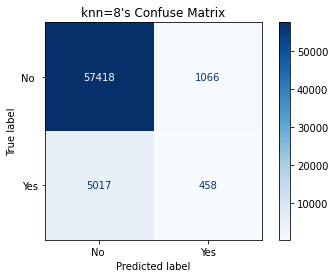

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(knn, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('knn=8\'s Confuse Matrix')
plt.grid(False)

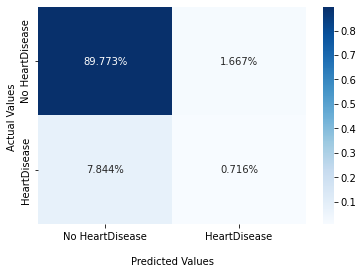

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.3%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


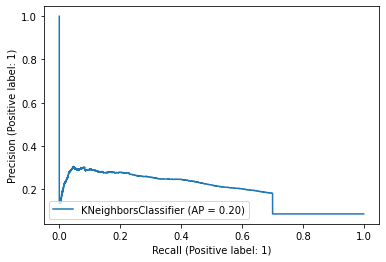

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(knn, X_test, y_test)

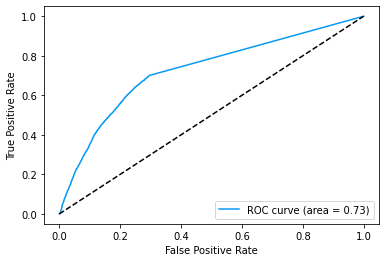

In [ ]:
plt.plot(fpr, tpr, color='xkcd:azure', 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### **k=8**

weights="distance"

X_train_up

In [ ]:
# k=8 有加權重
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X, y = df_used.loc[:, :], df_onehot['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, stratify=y, random_state=0)

# 選擇 k
range = np.arange(8,9)

for i in range:
  print("knn；", i)
  knn = KNeighborsClassifier(weights="distance", n_neighbors = i, n_jobs=-1)
  knn.fit(X_train_up, y_train_up)
  y_pred = knn.predict(X_test)
  # 計算accuracy  
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy：", accuracy)

  score = knn.score(X_test, y_test)
  print("score：", score)

  # 計算 AP 值
  y_score = knn.predict_proba(X_test)[::,1]
  ap = average_precision_score(y_test, y_score)
  print("AP：", ap)


  # 計算AUC
  fpr, tpr, _ = roc_curve(y_test, y_score)
  roc_auc = auc(fpr, tpr)
  print("AUC：", roc_auc)
  print("============================================")
  print(classification_report(y_test, y_pred))

knn； 8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Accuracy： 0.7914445191450773


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


score： 0.7914445191450773


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


AP： 0.17333145237829406
AUC： 0.7168424115685232
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     58484
           1       0.20      0.50      0.29      5475

    accuracy                           0.79     63959
   macro avg       0.57      0.66      0.58     63959
weighted avg       0.88      0.79      0.83     63959



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


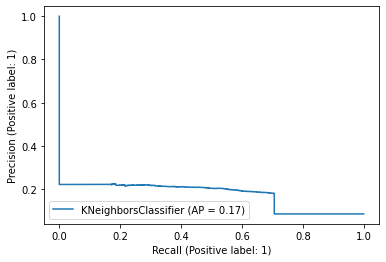

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(knn, X_test, y_test)

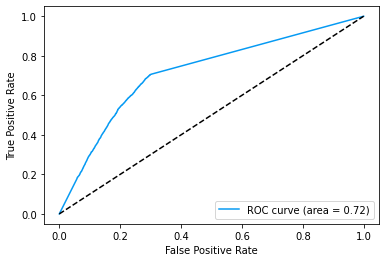

In [ ]:
plt.plot(fpr, tpr, color='xkcd:azure', 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


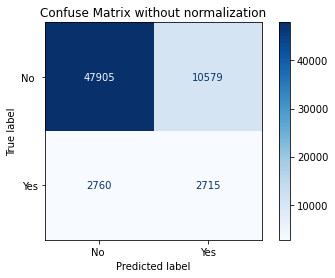

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['No ', 'Yes']
disp = plot_confusion_matrix(knn, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid(False)

### **圖表分析**

AP

In [3]:
df_outcome = pd.DataFrame()
outcome_index = ["Logistic", "LinearSVC", 'RBF', "RandomForest", "Knn"]
AP = [0.34619646359394407, 0.3283239709583593, 0.33571995059697657,  0.3387021871569071, 0.17333145237829406]
df_outcome.index=outcome_index
df_outcome["AP"] = AP
df_outcome

,AP
Logistic,0.346196
LinearSVC,0.328324
RBF,0.335720
RandomForest,0.338702
Knn,0.173331


AUC

In [4]:
AUC = [0.8411599004247035, 0.8375198368269321, 0.8380827117684921, 
      0.8380469216261466, 0.7168424115685232]
df_outcome["AUC"] = AUC
df_outcome

,AP,AUC
Logistic,0.346196,0.841160
LinearSVC,0.328324,0.837520
RBF,0.335720,0.838083
RandomForest,0.338702,0.838047
Knn,0.173331,0.716842


score

In [5]:
score = [0.7523726137056552, 0.8859425569505465, 0.7261057865194891, 0.7307024812770682, 0.7914445191450773]
df_outcome["SCORE"] = score

precision

In [6]:
precision = [0.23, 0.35, 0.21, 0.21, 0.20]
df_outcome["PREC"] = precision

recall

In [7]:
# 1(Yes)
recall = [0.78, 0.39, 0.81, 0.80, 0.50]
df_outcome["RECALL"] = recall

macro F1

In [8]:
macro = [0.60, 0.65, 0.58, 0.59, 0.58]
df_outcome["MACRO-F1"] = macro

In [9]:
df_outcome

,AP,AUC,SCORE,PREC,RECALL,MACRO-F1
Logistic,0.346196,0.841160,0.752373,0.23,0.78,0.60
LinearSVC,0.328324,0.837520,0.885943,0.35,0.39,0.65
RBF,0.335720,0.838083,0.726106,0.21,0.81,0.58
RandomForest,0.338702,0.838047,0.730702,0.21,0.80,0.59
Knn,0.173331,0.716842,0.791445,0.20,0.50,0.58


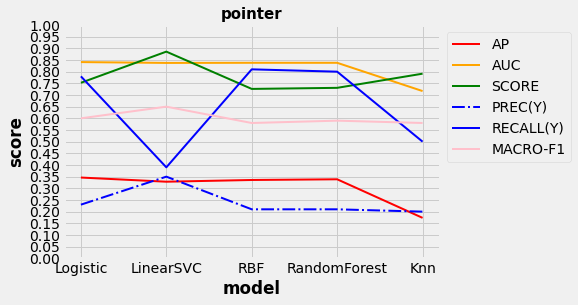

In [10]:
plt.style.use('fivethirtyeight')
# plt.plot(x, y, c)參數分別為x軸資料、y軸資料及線顏色
plt.plot(outcome_index, df_outcome["AP"], "r", lw=2)
plt.plot(outcome_index, df_outcome["AUC"], "orange", lw=2)
plt.plot(outcome_index, df_outcome["SCORE"], "green", lw=2)
plt.plot(outcome_index, df_outcome["PREC"], "b-.", lw=2)
plt.plot(outcome_index, df_outcome["RECALL"], "b", lw=2)
plt.plot(outcome_index, df_outcome["MACRO-F1"], "pink", lw=2)

label=["AP", "AUC", "SCORE", "PREC(Y)", "RECALL(Y)", "MACRO-F1"]

plt.legend(labels=label, bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.xlabel("model", fontweight = "bold") 
plt.ylabel("score", fontweight = "bold")
plt.title("pointer", fontsize = 15, fontweight = "bold", y = 1.0)
plt.ylim(0.0, 1.0)
from matplotlib.ticker import MultipleLocator
y_location = MultipleLocator(0.05)
ax = plt.gca()
ax.yaxis.set_major_locator(y_location)
# plt.xticks(rotation=45)   # 將x軸數字旋轉45度，避免文字重疊

# plt.savefig("file's name", # 儲存圖檔
#         bbox_inches='tight', # 去除座標軸占用的空間
#         pad_inches=0.0) # 去除所有白邊
# plt.close() # 關閉圖表

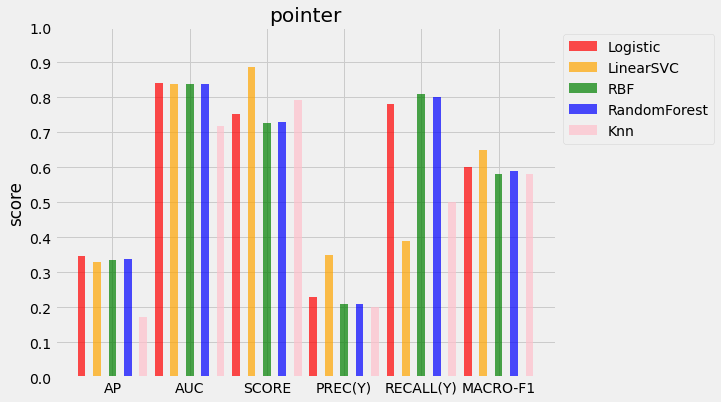

In [11]:
df_outcome = df_outcome.T
x = np.arange(6)
width = 0.2
plt.figure(figsize=(8,6))
plt.bar(x, df_outcome["Logistic"], width/2, color="red", alpha=0.7, label="Logistic")
plt.bar(x+width, df_outcome["LinearSVC"], width/2, color='orange', alpha=0.7, label='LinearSVC')
plt.bar(x+2*width, df_outcome["RBF"], width/2, color='green', alpha=0.7, label='RBF')
plt.bar(x+3*width, df_outcome["RandomForest"], width/2, color='blue', alpha=0.7, label='RandomForest')
plt.bar(x+4*width, df_outcome["Knn"], width/2, color='pink', alpha=0.7, label='Knn')
plt.xticks(x + 2*width, label)
plt.ylabel('score')
plt.title('pointer')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.ylim(0.0, 1.0)
from matplotlib.ticker import MultipleLocator
y_location = MultipleLocator(0.1)
ax = plt.gca()
ax.yaxis.set_major_locator(y_location)
plt.show()